In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_dataset(path, k):
    if (pd.isna(k)):
        if(all_res.loc[path]['Dataset']=='Phone'):
            k='/Phones/Results/'
        elif(all_res.loc[path]['Dataset']=='HeadPhone'):
            k='/Headphones/Results_changename/'
        else:
            k='/TVs/Results_changename/'
    
    
    df=pd.read_csv(os.getcwd()+k+path)

    total1=[]
    for i in df['label']:
        a=i.replace('[','').replace(']','').split(',')
        total1.append(sum([int(k.strip()) for k in a]))
    df['total1s']=total1

    sm=0
    ls=[]
    for i in df['total1s']:
        sm=sm+i
        ls.append(sm)

    df['total1s_cum']=ls

    return df

In [3]:
def whole_dataset(path, all_res, k='/Results/'):
    hp_all=get_dataset(path, k)
    f1_score_all=all_res.loc[path]['F1 Score']
    hp_all['f1_score']=round(hp_all['f1_score'],2)
    
    if('fetselect' in path):
        number_of1s=hp_all[hp_all['f1_score']>=f1_score_all].values[0][-2]
    else:
        number_of1s=hp_all[hp_all['f1_score']>=f1_score_all].values[0][-1]
    
    
    return number_of1s

## 1. Differen Comparisons

In [4]:
all_res=pd.read_csv('all_results_thesis.csv',sep=';')
all_res=all_res.set_index('full_name')
all_res['F1 Score']=[float(i.replace(',','.')) for i in all_res['F1 Score']]
all_res.head()

,Dataset,missing,features,query,alg_plain,alg,iteration,quota,Training Time,F1 Score
full_name,,,,,,,,,,
Faster_HeadPhone_opt3_onlylev_qbc_onlydt_10,HeadPhone,opt3,onlylev,qbc,dt,onlydt,0,10,3218,0.85
Faster_HeadPhone_opt3_onlyjaro_random_svm_10,HeadPhone,opt3,onlyjaro,random,svm,svm,0,10,804,0.00
Faster_HeadPhone_opt3_onlylev_random_svm_10,HeadPhone,opt3,onlylev,random,svm,svm,0,10,751,0.00
Faster_HeadPhone_opt3_all_qbc_onlysvm_10,HeadPhone,opt3,all,qbc,svm,onlysvm,0,10,24335,0.00
Faster_HeadPhone_opt4_onlyjaro_random_svm_10,HeadPhone,opt4,onlyjaro,random,svm,svm,0,10,592,0.00


In [5]:
n_1=[]
for i in all_res.index:
    if(all_res.loc[i]['Dataset']=='Phone'):
        k='/Phones/Results/'
    elif(all_res.loc[i]['Dataset']=='HeadPhone'):
        k='/Headphones/Results_changename/'
    else:
        k='/TVs/Results_changename/'
    
    #hp_all=get_dataset(i, k)
    n_1.append(whole_dataset(i, all_res, k))

In [6]:
all_res['n_1s_until_iter']=n_1

In [7]:
all_res.to_csv('all_results.csv')

## 1.1. Missing Handling

- Comparison missing options: uncertainity & log & only jaccard

In [8]:
p_m3=get_dataset('Faster_Phone_opt3_onlyjac_qbc_onlydt_10', k='/Phones/Results/')
p_m3_r=get_dataset('Faster_Phone_opt3_onlyjac_random_dt_10', k='/Phones/Results/')
p_m4=get_dataset('Faster_Phone_opt4_onlyjac_qbc_onlydt_10', k='/Phones/Results/')
p_m4_r=get_dataset('Faster_Phone_opt4_onlyjac_random_dt_10', k='/Phones/Results/')
h_m3=get_dataset('Faster_HeadPhone_opt3_onlyjac_qbc_onlydt_10', k='/Headphones/Results_changename/')
h_m3_r=get_dataset('Faster_HeadPhone_opt3_onlyjac_random_dt_10', k='/Headphones/Results_changename/')
h_m4=get_dataset('Faster_HeadPhone_opt4_onlyjac_qbc_onlydt_10', k='/Headphones/Results_changename/')
h_m4_r=get_dataset('Faster_HeadPhone_opt4_onlyjac_random_dt_10', k='/Headphones/Results_changename/')
t_m3=get_dataset('Faster_TVs_opt3_onlyjac_qbc_onlydt_10', k='/TVs/Results_changename/')
t_m3_r=get_dataset('Faster_TVs_opt3_onlyjac_random_dt_10', k='/TVs/Results_changename/')
t_m4=get_dataset('Faster_TVs_opt4_onlyjac_qbc_onlydt_10', k='/TVs/Results_changename/')
t_m4_r=get_dataset('Faster_TVs_opt4_onlyjac_random_dt_10', k='/TVs/Results_changename/')




In [12]:
iter_=all_res.loc[df_name]['iteration']
iter_

15

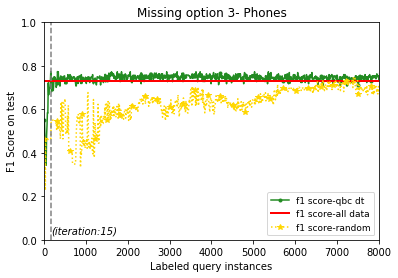

In [44]:
df_name='Faster_Phone_opt3_onlyjac_qbc_onlydt_10'

f1_score=all_res.loc[df_name]['F1 Score']
iter_=all_res.loc[df_name]['iteration']
q=all_res.loc[df_name]['quota']

plt.plot(p_m3['quota'], p_m3['f1_score'], 'forestgreen',label='f1 score-qbc dt',marker='.',markevery=30)
#plt.plot(p_m4['quota'], jac_3_2['f1_score'], 'lightseagreen',label='f1 score-qbc')
plt.plot(p_m3['quota'], [f1_score] * (len(p_m3['quota'])), '-r',linewidth=2, label='f1 score-all data')
plt.plot(p_m3_r['quota'], p_m3_r['f1_score'], 'gold',linestyle = ':',label='f1 score-random', marker='*',markevery=30)
plt.axvline(x=q, color='grey',linestyle = '--')
plt.text(q, 0.03, '(iteration:'+str(iter_)+')', style='italic')

plt.title('Missing option 3- Phones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 9})
plt.ylim(0, 1.0)
plt.xlim(0, 8000)
plt.savefig('mis_phones_missopt3.png')

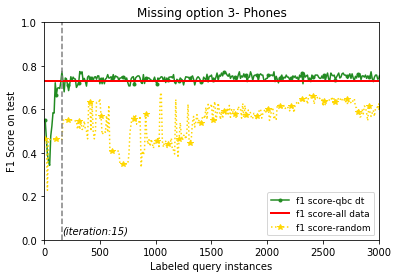

In [45]:
df_name='Faster_Phone_opt3_onlyjac_qbc_onlydt_10'

f1_score=all_res.loc[df_name]['F1 Score']
iter_=all_res.loc[df_name]['iteration']
q=all_res.loc[df_name]['quota']

plt.plot(p_m3['quota'], p_m3['f1_score'], 'forestgreen',label='f1 score-qbc dt',marker='.',markevery=10)
#plt.plot(p_m4['quota'], jac_3_2['f1_score'], 'lightseagreen',label='f1 score-qbc')
plt.plot(p_m3['quota'], [f1_score] * (len(p_m3['quota'])), '-r',linewidth=2, label='f1 score-all data')
plt.plot(p_m3_r['quota'], p_m3_r['f1_score'], 'gold',linestyle = ':',label='f1 score-random', marker='*',markevery=10)
plt.axvline(x=q, color='grey',linestyle = '--')
plt.text(q, 0.03, '(iteration:'+str(iter_)+')', style='italic')

plt.title('Missing option 3- Phones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 9})
plt.ylim(0, 1.0)
plt.xlim(0, 3000)
plt.savefig('mis_phones_missopt3_closeup.png')

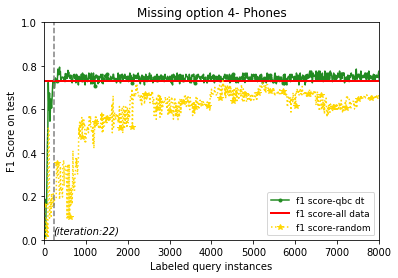

In [46]:
df_name='Faster_Phone_opt4_onlyjac_qbc_onlydt_10'

f1_score=all_res.loc[df_name]['F1 Score']
iter_=all_res.loc[df_name]['iteration']
q=all_res.loc[df_name]['quota']

plt.plot(p_m4['quota'], p_m4['f1_score'], 'forestgreen',label='f1 score-qbc dt',marker='.',markevery=30)
#plt.plot(p_m4['quota'], jac_3_2['f1_score'], 'lightseagreen',label='f1 score-qbc')
plt.plot(p_m4['quota'], [f1_score] * (len(p_m4['quota'])), '-r',linewidth=2, label='f1 score-all data')
plt.plot(p_m4_r['quota'], p_m4_r['f1_score'], 'gold',linestyle = ':',label='f1 score-random', marker='*',markevery=30)
plt.axvline(x=q, color='grey',linestyle = '--')
plt.text(q, 0.03, '(iteration:'+str(iter_)+')', style='italic')

plt.title('Missing option 4- Phones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 9})
plt.ylim(0, 1.0)
plt.xlim(0, 8000)
plt.savefig('mis_phones_missopt4.png')

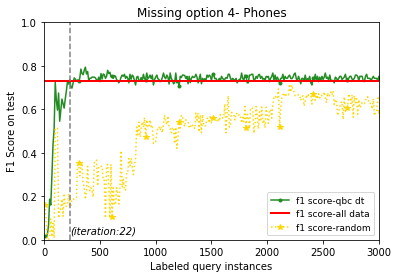

In [47]:
df_name='Faster_Phone_opt4_onlyjac_qbc_onlydt_10'

f1_score=all_res.loc[df_name]['F1 Score']
iter_=all_res.loc[df_name]['iteration']
q=all_res.loc[df_name]['quota']

plt.plot(p_m4['quota'], p_m4['f1_score'], 'forestgreen',label='f1 score-qbc dt',marker='.',markevery=30)
#plt.plot(p_m4['quota'], jac_3_2['f1_score'], 'lightseagreen',label='f1 score-qbc')
plt.plot(p_m4['quota'], [f1_score] * (len(p_m4['quota'])), '-r',linewidth=2, label='f1 score-all data')
plt.plot(p_m4_r['quota'], p_m4_r['f1_score'], 'gold',linestyle = ':',label='f1 score-random', marker='*',markevery=30)
plt.axvline(x=q, color='grey',linestyle = '--')
plt.text(q, 0.03, '(iteration:'+str(iter_)+')', style='italic')

plt.title('Missing option 4- Phones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 9})
plt.ylim(0, 1.0)
plt.xlim(0, 3000)
plt.savefig('mis_phones_missopt4_closeup.png')

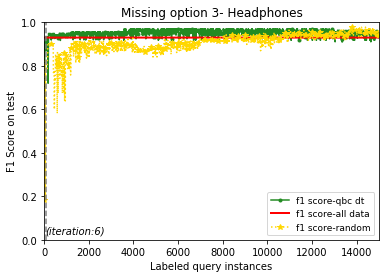

In [48]:
df_name='Faster_HeadPhone_opt3_onlyjac_qbc_onlydt_10'

f1_score=all_res.loc[df_name]['F1 Score']
iter_=all_res.loc[df_name]['iteration']
q=all_res.loc[df_name]['quota']

plt.plot(h_m3['quota'], h_m3['f1_score'], 'forestgreen',label='f1 score-qbc dt',marker='.',markevery=30)
#plt.plot(p_m4['quota'], jac_3_2['f1_score'], 'lightseagreen',label='f1 score-qbc')
plt.plot(h_m3['quota'], [f1_score] * (len(h_m3['quota'])), '-r',linewidth=2, label='f1 score-all data')
plt.plot(h_m3_r['quota'], h_m3_r['f1_score'], 'gold',linestyle = ':',label='f1 score-random', marker='*',markevery=30)
plt.axvline(x=q, color='grey',linestyle = '--')
plt.text(q, 0.03, '(iteration:'+str(iter_)+')', style='italic')

plt.title('Missing option 3- Headphones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 9})
plt.ylim(0, 1.0)
plt.xlim(0, 15000)
plt.savefig('mis_hp_missopt3.png')

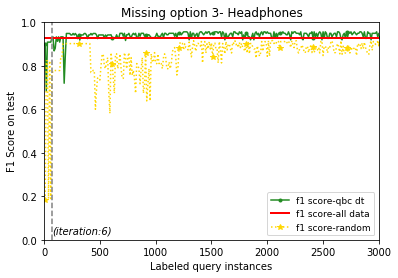

In [49]:
df_name='Faster_HeadPhone_opt3_onlyjac_qbc_onlydt_10'

f1_score=all_res.loc[df_name]['F1 Score']
iter_=all_res.loc[df_name]['iteration']
q=all_res.loc[df_name]['quota']

plt.plot(h_m3['quota'], h_m3['f1_score'], 'forestgreen',label='f1 score-qbc dt',marker='.',markevery=30)
#plt.plot(p_m4['quota'], jac_3_2['f1_score'], 'lightseagreen',label='f1 score-qbc')
plt.plot(h_m3['quota'], [f1_score] * (len(h_m3['quota'])), '-r',linewidth=2, label='f1 score-all data')
plt.plot(h_m3_r['quota'], h_m3_r['f1_score'], 'gold',linestyle = ':',label='f1 score-random', marker='*',markevery=30)
plt.axvline(x=q, color='grey',linestyle = '--')
plt.text(q, 0.03, '(iteration:'+str(iter_)+')', style='italic')

plt.title('Missing option 3- Headphones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 9})
plt.ylim(0, 1.0)
plt.xlim(0, 3000)
plt.savefig('mis_hp_missopt3_closeup.png')

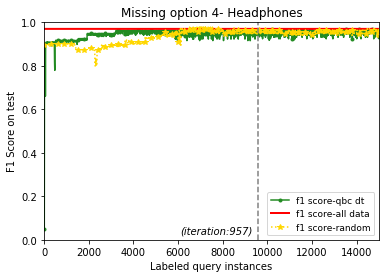

In [50]:
df_name='Faster_HeadPhone_opt4_onlyjac_qbc_onlydt_10'

f1_score=all_res.loc[df_name]['F1 Score']
iter_=all_res.loc[df_name]['iteration']
q=all_res.loc[df_name]['quota']

plt.plot(h_m4['quota'], h_m4['f1_score'], 'forestgreen',label='f1 score-qbc dt',marker='.',markevery=30)
#plt.plot(p_m4['quota'], jac_3_2['f1_score'], 'lightseagreen',label='f1 score-qbc')
plt.plot(h_m4['quota'], [f1_score] * (len(h_m4['quota'])), '-r',linewidth=2, label='f1 score-all data')
plt.plot(h_m4_r['quota'], h_m4_r['f1_score'], 'gold',linestyle = ':',label='f1 score-random', marker='*',markevery=30)
plt.axvline(x=q, color='grey',linestyle = '--')
plt.text(q-3500, 0.03, '(iteration:'+str(iter_)+')', style='italic')

plt.title('Missing option 4- Headphones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 9})
plt.ylim(0, 1.0)
plt.xlim(0, 15000)
plt.savefig('mis_hp_missopt4.png')

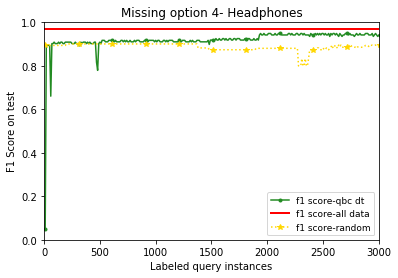

In [51]:
df_name='Faster_HeadPhone_opt4_onlyjac_qbc_onlydt_10'

f1_score=all_res.loc[df_name]['F1 Score']
iter_=all_res.loc[df_name]['iteration']
q=all_res.loc[df_name]['quota']

plt.plot(h_m4['quota'], h_m4['f1_score'], 'forestgreen',label='f1 score-qbc dt',marker='.',markevery=30)
#plt.plot(p_m4['quota'], jac_3_2['f1_score'], 'lightseagreen',label='f1 score-qbc')
plt.plot(h_m4['quota'], [f1_score] * (len(h_m4['quota'])), '-r',linewidth=2, label='f1 score-all data')
plt.plot(h_m4_r['quota'], h_m4_r['f1_score'], 'gold',linestyle = ':',label='f1 score-random', marker='*',markevery=30)
plt.axvline(x=q, color='grey',linestyle = '--')
#plt.text(q-3500, 0.03, '(iteration:'+str(iter_)+')', style='italic')

plt.title('Missing option 4- Headphones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 9})
plt.ylim(0, 1.0)
plt.xlim(0, 3000)
plt.savefig('mis_hp_missopt4_closeup.png')

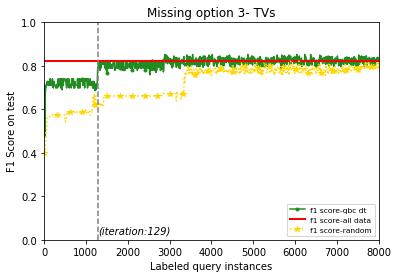

In [52]:
df_name='Faster_TVs_opt3_onlyjac_qbc_onlydt_10'

f1_score=all_res.loc[df_name]['F1 Score']
iter_=all_res.loc[df_name]['iteration']
q=all_res.loc[df_name]['quota']

plt.plot(t_m3['quota'], t_m3['f1_score'], 'forestgreen',label='f1 score-qbc dt',marker='.',markevery=30)
#plt.plot(p_m4['quota'], jac_3_2['f1_score'], 'lightseagreen',label='f1 score-qbc')
plt.plot(t_m3['quota'], [f1_score] * (len(t_m3['quota'])), '-r',linewidth=2, label='f1 score-all data')
plt.plot(t_m3_r['quota'], t_m3_r['f1_score'], 'gold',linestyle = ':',label='f1 score-random', marker='*',markevery=30)
plt.axvline(x=q, color='grey',linestyle = '--')
plt.text(q, 0.03, '(iteration:'+str(iter_)+')', style='italic')

plt.title('Missing option 3- TVs')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 7.5})
plt.ylim(0, 1.0)
plt.xlim(0, 8000)
plt.savefig('mis_tv_missopt3.png')

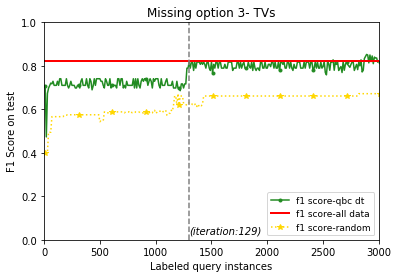

In [53]:
df_name='Faster_TVs_opt3_onlyjac_qbc_onlydt_10'

f1_score=all_res.loc[df_name]['F1 Score']
iter_=all_res.loc[df_name]['iteration']
q=all_res.loc[df_name]['quota']

plt.plot(t_m3['quota'], t_m3['f1_score'], 'forestgreen',label='f1 score-qbc dt',marker='.',markevery=30)
#plt.plot(p_m4['quota'], jac_3_2['f1_score'], 'lightseagreen',label='f1 score-qbc')
plt.plot(t_m3['quota'], [f1_score] * (len(t_m3['quota'])), '-r',linewidth=2, label='f1 score-all data')
plt.plot(t_m3_r['quota'], t_m3_r['f1_score'], 'gold',linestyle = ':',label='f1 score-random', marker='*',markevery=30)
plt.axvline(x=q, color='grey',linestyle = '--')
plt.text(q, 0.03, '(iteration:'+str(iter_)+')', style='italic')

plt.title('Missing option 3- TVs')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 9})
plt.ylim(0, 1.0)
plt.xlim(0, 3000)
plt.savefig('mis_tv_missopt3_closeup.png')

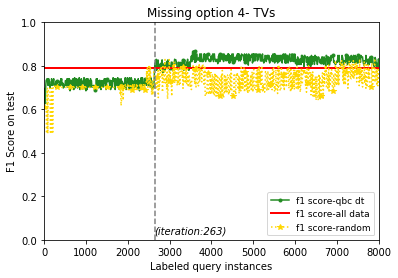

In [54]:
df_name='Faster_TVs_opt4_onlyjac_qbc_onlydt_10'

f1_score=all_res.loc[df_name]['F1 Score']
iter_=all_res.loc[df_name]['iteration']
q=all_res.loc[df_name]['quota']

plt.plot(t_m4['quota'], t_m4['f1_score'], 'forestgreen',label='f1 score-qbc dt',marker='.',markevery=30)
#plt.plot(p_m4['quota'], jac_3_2['f1_score'], 'lightseagreen',label='f1 score-qbc')
plt.plot(t_m4['quota'], [f1_score] * (len(t_m4['quota'])), '-r',linewidth=2, label='f1 score-all data')
plt.plot(t_m4_r['quota'], t_m4_r['f1_score'], 'gold',linestyle = ':',label='f1 score-random', marker='*',markevery=30)
plt.axvline(x=q, color='grey',linestyle = '--')
plt.text(q, 0.03, '(iteration:'+str(iter_)+')', style='italic')

plt.title('Missing option 4- TVs')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 9})
plt.ylim(0, 1.0)
plt.xlim(0, 8000)
plt.savefig('mis_tv_missopt4.png')

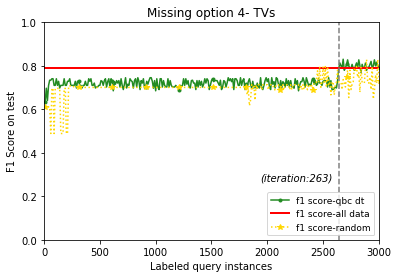

In [57]:
df_name='Faster_TVs_opt4_onlyjac_qbc_onlydt_10'

f1_score=all_res.loc[df_name]['F1 Score']
iter_=all_res.loc[df_name]['iteration']
q=all_res.loc[df_name]['quota']

plt.plot(t_m4['quota'], t_m4['f1_score'], 'forestgreen',label='f1 score-qbc dt',marker='.',markevery=30)
#plt.plot(p_m4['quota'], jac_3_2['f1_score'], 'lightseagreen',label='f1 score-qbc')
plt.plot(t_m4['quota'], [f1_score] * (len(t_m4['quota'])), '-r',linewidth=2, label='f1 score-all data')
plt.plot(t_m4_r['quota'], t_m4_r['f1_score'], 'gold',linestyle = ':',label='f1 score-random', marker='*',markevery=30)
plt.axvline(x=q, color='grey',linestyle = '--')
plt.text(q-700, 0.27, '(iteration:'+str(iter_)+')', style='italic')

plt.title('Missing option 4- TVs')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 9})
plt.ylim(0, 1.0)
plt.xlim(0, 3000)
plt.savefig('mis_tv_missopt4_closeup.png')

## 1.2. Similarity Effect

### 1.2.1 F1 Score Effect

In [115]:
p_all=get_dataset('Faster_Phone_opt4_all_uncertainity_log_10', k='/Phones/Results/')
p_fet=get_dataset('Faster_Phone_opt4_fetselect_uncertainity_log_10', k='/Phones/Results/')
p_jac=get_dataset('Faster_Phone_opt4_onlyjac_uncertainity_log_10', k='/Phones/Results/')
p_jaro=get_dataset('Faster_Phone_opt4_onlyjaro_uncertainity_log_10', k='/Phones/Results/')
p_lev=get_dataset('Faster_Phone_opt4_onlylev_uncertainity_log_10', k='/Phones/Results/')


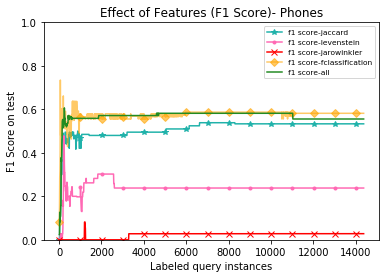

In [116]:
plt.plot(p_all['quota'], p_jac['f1_score'], 'lightseagreen',label='f1 score-jaccard', marker='*',markevery=100)
plt.plot(p_all['quota'], p_lev['f1_score'], 'hotpink',label='f1 score-levenstein',marker='.',markevery=100)
plt.plot(p_all['quota'], p_jaro['f1_score'], 'red',label='f1 score-jarowinkler',marker='x',markevery=100)
plt.plot(p_all['quota'], p_fet['f1_score'], 'orange',label='f1 score-fclassification',marker='D',markevery=100,alpha=0.6)
plt.plot(p_all['quota'], p_all['f1_score'], 'forestgreen',label='f1 score-all')

plt.title('Effect of Features (F1 Score)- Phones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='upper right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.savefig('Feature_Effect_Phone.png')

In [117]:
hp_all=get_dataset('Faster_HeadPhone_opt4_all_uncertainity_log_10', k='/Headphones/Results_changename/')
hp_fet=get_dataset('Faster_HeadPhone_opt4_fetselect_uncertainity_log_10', k='/Headphones/Results_changename/')
hp_jac=get_dataset('Faster_HeadPhone_opt4_onlyjac_uncertainity_log_10', k='/Headphones/Results_changename/')
hp_jaro=get_dataset('Faster_HeadPhone_opt4_onlyjaro_uncertainity_log_10', k='/Headphones/Results_changename/')
hp_lev=get_dataset('Faster_HeadPhone_opt4_onlylev_uncertainity_log_10', k='/Headphones/Results_changename/')


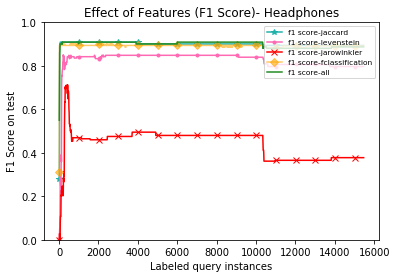

In [118]:
plt.plot(hp_all['quota'], hp_jac['f1_score'], 'lightseagreen',label='f1 score-jaccard',marker='*',markevery=100)
plt.plot(hp_all['quota'], hp_lev['f1_score'], 'hotpink',label='f1 score-levenstein',marker='.',markevery=100)
plt.plot(hp_all['quota'], hp_jaro['f1_score'], 'red',label='f1 score-jarowinkler',marker='x',markevery=100)
plt.plot(hp_all['quota'], hp_fet['f1_score'], 'orange',label='f1 score-fclassification',alpha=0.6, marker='D',markevery=100)
plt.plot(hp_all['quota'], hp_all['f1_score'], 'forestgreen',label='f1 score-all')


plt.title('Effect of Features (F1 Score)- Headphones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='upper right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.savefig('Feature_Effect_Headphone.png')

In [119]:
tv_all=get_dataset('Faster_TVs_opt4_all_uncertainity_log_10', k='/TVs/Results_changename/')
tv_fet=get_dataset('Faster_TVs_opt4_fetselect_uncertainity_log_10', k='/TVs/Results_changename/')
tv_jac=get_dataset('Faster_TVs_opt4_onlyjac_uncertainity_log_10', k='/TVs/Results_changename/')
tv_jaro=get_dataset('Faster_TVs_opt4_onlyjaro_uncertainity_log_10', k='/TVs/Results_changename/')
tv_lev=get_dataset('Faster_TVs_opt4_onlylev_uncertainity_log_10', k='/TVs/Results_changename/')


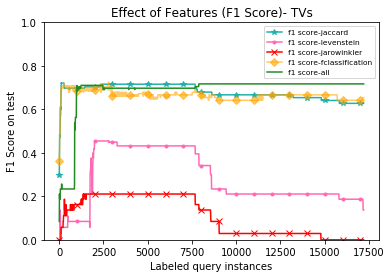

In [120]:
plt.plot(tv_all['quota'], tv_jac['f1_score'], 'lightseagreen',label='f1 score-jaccard', marker='*',markevery=100)
plt.plot(tv_all['quota'], tv_lev['f1_score'], 'hotpink',label='f1 score-levenstein',marker='.',markevery=100)
plt.plot(tv_all['quota'], tv_jaro['f1_score'], 'red',label='f1 score-jarowinkler',marker='x',markevery=100)
plt.plot(tv_all['quota'], tv_fet['f1_score'], 'orange',label='f1 score-fclassification',alpha=0.6, marker='D',markevery=100)
plt.plot(tv_all['quota'], tv_all['f1_score'], 'forestgreen',label='f1 score-all')


plt.title('Effect of Features (F1 Score)- TVs')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='upper right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.savefig('Feature_Effect_TVs.png')

### 1.2.2 Convergence Effect

In [121]:
p_all_name='Faster_Phone_opt4_all_uncertainity_log_10'
p_all=get_dataset(p_all_name, k='/Phones/Results/')
f1_score_all=all_res.loc[p_all_name]['F1 Score']
iter_score_all=all_res.loc[p_all_name]['iteration']
q_all=all_res.loc[p_all_name]['quota']
lb_all = 'f1 score-all(iter:'+str(iter_score_all)+')'

p_fet_name='Faster_Phone_opt4_fetselect_uncertainity_log_10'
p_fet=get_dataset(p_fet_name, k='/Phones/Results/')
f1_score_fet=all_res.loc[p_fet_name]['F1 Score']
iter_score_fet=all_res.loc[p_fet_name]['iteration']
q_fet=all_res.loc[p_fet_name]['quota']
lb_fet = 'f1 score-feature(iter:'+str(iter_score_fet)+')'

p_jac_name='Faster_Phone_opt4_onlyjac_uncertainity_log_10'
p_jac=get_dataset(p_jac_name, k='/Phones/Results/')
f1_score_jac=all_res.loc[p_jac_name]['F1 Score']
iter_score_jac=all_res.loc[p_jac_name]['iteration']
q_jac=all_res.loc[p_jac_name]['quota']
lb_jac = 'f1 score-jaccard(iter:'+str(iter_score_jac)+')'

p_jaro_name='Faster_Phone_opt4_onlyjaro_uncertainity_log_10'
p_jaro=get_dataset(p_jaro_name, k='/Phones/Results/')
f1_score_jaro=all_res.loc[p_jaro_name]['F1 Score']
iter_score_jaro=all_res.loc[p_jaro_name]['iteration']
q_jaro=all_res.loc[p_jaro_name]['quota']
lb_jaro = 'f1 score-jaro(iter:'+str(iter_score_jaro)+')'

p_lev_name='Faster_Phone_opt3_onlylev_uncertainity_log_10'
p_lev=get_dataset(p_lev_name, k='/Phones/Results/')
f1_score_lev=all_res.loc[p_lev_name]['F1 Score']
iter_score_lev=all_res.loc[p_lev_name]['iteration']
q_lev=all_res.loc[p_lev_name]['quota']
lb_lev = 'f1 score-levenstein(iter:'+str(iter_score_lev)+')'

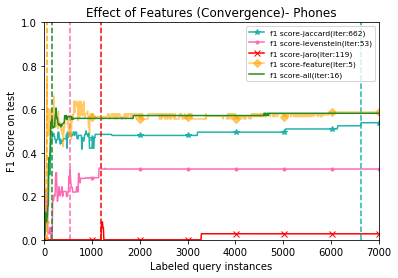

In [122]:
plt.plot(p_all['quota'], p_jac['f1_score'], 'lightseagreen',label=lb_jac, marker='*',markevery=100)
plt.axvline(x=q_jac, color='lightseagreen',linestyle = '--')
plt.plot(p_all['quota'], p_lev['f1_score'], 'hotpink',label=lb_lev,marker='.',markevery=100)
plt.axvline(x=q_lev, color='hotpink',linestyle = '--')
plt.plot(p_all['quota'], p_jaro['f1_score'], 'red',label=lb_jaro,marker='x',markevery=100)
plt.axvline(x=q_jaro, color='red',linestyle = '--')
plt.plot(p_all['quota'], p_fet['f1_score'], 'orange',label=lb_fet,marker='D',markevery=100,alpha=0.6)
plt.axvline(x=q_fet, color='orange',linestyle = '--')
plt.plot(p_all['quota'], p_all['f1_score'], 'forestgreen',label=lb_all)
plt.axvline(x=q_all, color='forestgreen',linestyle = '--')

plt.title('Effect of Features (Convergence)- Phones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='upper right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.xlim(0, 7000)
plt.savefig('Feature_Effect2_Phone.png')

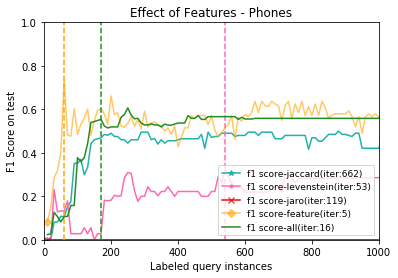

In [123]:
plt.plot(p_all['quota'], p_jac['f1_score'], 'lightseagreen',label=lb_jac, marker='*',markevery=100)
plt.axvline(x=q_jac, color='lightseagreen',linestyle = '--')
plt.plot(p_all['quota'], p_lev['f1_score'], 'hotpink',label=lb_lev,marker='.',markevery=100)
plt.axvline(x=q_lev, color='hotpink',linestyle = '--')
plt.plot(p_all['quota'], p_jaro['f1_score'], 'red',label=lb_jaro,marker='x',markevery=100)
plt.axvline(x=q_jaro, color='red',linestyle = '--')
plt.plot(p_all['quota'], p_fet['f1_score'], 'orange',label=lb_fet,marker='D',markevery=100,alpha=0.6)
plt.axvline(x=q_fet, color='orange',linestyle = '--')
plt.plot(p_all['quota'], p_all['f1_score'], 'forestgreen',label=lb_all)
plt.axvline(x=q_all, color='forestgreen',linestyle = '--')

plt.title('Effect of Features - Phones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 9})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.xlim(0, 1000)
plt.savefig('Feature_Effect2_Phone_closeup.png')

In [124]:
hp_all_name='Faster_HeadPhone_opt4_all_uncertainity_log_10'
hp_all=get_dataset(hp_all_name, k='/Headphones/Results_changename/')
f1_score_all=all_res.loc[hp_all_name]['F1 Score']
iter_score_all=all_res.loc[hp_all_name]['iteration']
q_all=all_res.loc[hp_all_name]['quota']
lb_all = 'f1 score-all(iter:'+str(iter_score_all)+')'

hp_fet_name='Faster_HeadPhone_opt4_fetselect_uncertainity_log_10'
hp_fet=get_dataset(hp_fet_name, k='/Headphones/Results_changename/')
f1_score_fet=all_res.loc[hp_fet_name]['F1 Score']
iter_score_fet=all_res.loc[hp_fet_name]['iteration']
q_fet=all_res.loc[hp_fet_name]['quota']
lb_fet = 'f1 score-feature(iter:'+str(iter_score_fet)+')'

hp_jac_name='Faster_HeadPhone_opt4_onlyjac_uncertainity_log_10'
hp_jac=get_dataset(hp_jac_name, k='/Headphones/Results_changename/')
f1_score_jac=all_res.loc[hp_jac_name]['F1 Score']
iter_score_jac=all_res.loc[hp_jac_name]['iteration']
q_jac=all_res.loc[hp_jac_name]['quota']
lb_jac = 'f1 score-jaccard(iter:'+str(iter_score_jac)+')'

hp_jaro_name='Faster_HeadPhone_opt4_onlyjaro_uncertainity_log_10'
hhp_jaro=get_dataset(hp_jaro_name, k='/Headphones/Results_changename/')
f1_score_jaro=all_res.loc[hp_jaro_name]['F1 Score']
iter_score_jaro=all_res.loc[hp_jaro_name]['iteration']
q_jaro=all_res.loc[hp_jaro_name]['quota']
lb_jaro = 'f1 score-jaro(iter:'+str(iter_score_jaro)+')'

hp_lev_name='Faster_HeadPhone_opt3_onlylev_uncertainity_log_10'
hp_lev=get_dataset(hp_lev_name, k='/Headphones/Results_changename/')
f1_score_lev=all_res.loc[hp_lev_name]['F1 Score']
iter_score_lev=all_res.loc[hp_lev_name]['iteration']
q_lev=all_res.loc[hp_lev_name]['quota']
lb_lev = 'f1 score-levenstein(iter:'+str(iter_score_lev)+')'

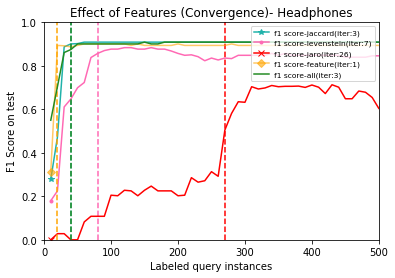

In [125]:
plt.plot(hp_all['quota'], hp_jac['f1_score'], 'lightseagreen',label=lb_jac, marker='*',markevery=100)
plt.axvline(x=q_jac, color='lightseagreen',linestyle = '--')

plt.plot(hp_all['quota'], hp_lev['f1_score'], 'hotpink',label=lb_lev,marker='.',markevery=100)
plt.axvline(x=q_lev, color='hotpink',linestyle = '--')

plt.plot(hp_all['quota'], hp_jaro['f1_score'], 'red',label=lb_jaro,marker='x',markevery=100)
plt.axvline(x=q_jaro, color='red',linestyle = '--')

plt.plot(hp_all['quota'], hp_fet['f1_score'], 'orange',label=lb_fet,marker='D',markevery=100,alpha=0.6)
plt.axvline(x=q_fet, color='orange',linestyle = '--')

plt.plot(hp_all['quota'], hp_all['f1_score'], 'forestgreen',label=lb_all)
plt.axvline(x=q_all, color='forestgreen',linestyle = '--')

plt.title('Effect of Features (Convergence)- Headphones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='upper right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.xlim(0, 500)
plt.savefig('Feature_Effect2_HeadPhone.png')

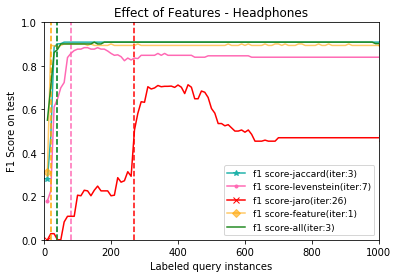

In [126]:
plt.plot(hp_all['quota'], hp_jac['f1_score'], 'lightseagreen',label=lb_jac, marker='*',markevery=100)
plt.axvline(x=q_jac, color='lightseagreen',linestyle = '--')

plt.plot(hp_all['quota'], hp_lev['f1_score'], 'hotpink',label=lb_lev,marker='.',markevery=100)
plt.axvline(x=q_lev, color='hotpink',linestyle = '--')

plt.plot(hp_all['quota'], hp_jaro['f1_score'], 'red',label=lb_jaro,marker='x',markevery=100)
plt.axvline(x=q_jaro, color='red',linestyle = '--')

plt.plot(hp_all['quota'], hp_fet['f1_score'], 'orange',label=lb_fet,marker='D',markevery=100,alpha=0.6)
plt.axvline(x=q_fet, color='orange',linestyle = '--')

plt.plot(hp_all['quota'], hp_all['f1_score'], 'forestgreen',label=lb_all)
plt.axvline(x=q_all, color='forestgreen',linestyle = '--')

plt.title('Effect of Features - Headphones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 9})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.xlim(0, 1000)
plt.savefig('Feature_Effect2_HeadPhone_closeup.png')

In [127]:
tv_all_name='Faster_TVs_opt4_all_uncertainity_log_10'
tv_all=get_dataset(tv_all_name, k='/TVs/Results_changename/')
f1_score_all=all_res.loc[tv_all_name]['F1 Score']
iter_score_all=all_res.loc[tv_all_name]['iteration']
q_all=all_res.loc[tv_all_name]['quota']
lb_all = 'f1 score-all(iter:'+str(iter_score_all)+')'

tv_fet_name='Faster_TVs_opt4_fetselect_uncertainity_log_10'
tv_fet=get_dataset(tv_fet_name, k='/TVs/Results_changename/')
f1_score_fet=0.65
iter_score_fet=9
q_fet=100
lb_fet = 'f1 score-feature(iter:'+str(iter_score_fet)+')'

tv_jac_name='Faster_TVs_opt4_onlyjac_uncertainity_log_10'
tv_jac=get_dataset(tv_jac_name, k='/TVs/Results_changename/')
f1_score_jac=all_res.loc[tv_jac_name]['F1 Score']
iter_score_jac=all_res.loc[tv_jac_name]['iteration']
q_jac=all_res.loc[tv_jac_name]['quota']
lb_jac = 'f1 score-jaccard(iter:'+str(iter_score_jac)+')'

tv_jaro_name='Faster_TVs_opt4_onlyjaro_uncertainity_log_10'
tv_jaro=get_dataset(tv_jaro_name, k='/TVs/Results_changename/')
f1_score_jaro=all_res.loc[tv_jaro_name]['F1 Score']
iter_score_jaro=all_res.loc[tv_jaro_name]['iteration']
q_jaro=all_res.loc[tv_jaro_name]['quota']
lb_jaro = 'f1 score-jaro(iter:'+str(iter_score_jaro)+')'

tv_lev_name='Faster_TVs_opt3_onlylev_uncertainity_log_10'
tv_lev=get_dataset(tv_lev_name, k='/TVs/Results_changename/')
f1_score_lev=all_res.loc[tv_lev_name]['F1 Score']
iter_score_lev=all_res.loc[tv_lev_name]['iteration']
q_lev=all_res.loc[tv_lev_name]['quota']
lb_lev = 'f1 score-levenstein(iter:'+str(iter_score_lev)+')'

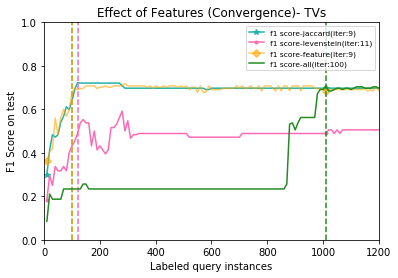

In [128]:
plt.plot(tv_all['quota'], tv_jac['f1_score'], 'lightseagreen',label=lb_jac, marker='*',markevery=100)
plt.axvline(x=q_jac, color='lightseagreen',linestyle = '--')

plt.plot(tv_all['quota'], tv_lev['f1_score'], 'hotpink',label=lb_lev,marker='.',markevery=100)
plt.axvline(x=q_lev, color='hotpink',linestyle = '--')

#plt.plot(tv_all['quota'], tv_jaro['f1_score'], 'red',label=lb_jaro,marker='x',markevery=100)
#plt.axvline(x=q_jaro, color='red',linestyle = '--')

plt.plot(tv_all['quota'], tv_fet['f1_score'], 'orange',label=lb_fet,marker='D',markevery=100,alpha=0.6)
plt.axvline(x=q_fet, color='orange',linestyle = '--')

plt.plot(tv_all['quota'], tv_all['f1_score'], 'forestgreen',label=lb_all)
plt.axvline(x=q_all, color='forestgreen',linestyle = '--')

plt.title('Effect of Features (Convergence)- TVs')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='upper right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.xlim(0, 1200)
plt.savefig('Feature_Effect2_TV.png')

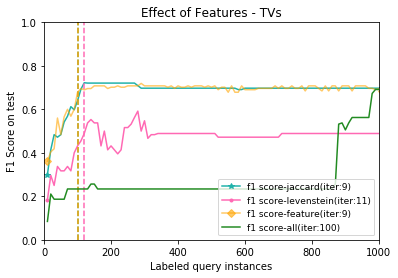

In [129]:
plt.plot(tv_all['quota'], tv_jac['f1_score'], 'lightseagreen',label=lb_jac, marker='*',markevery=100)
plt.axvline(x=q_jac, color='lightseagreen',linestyle = '--')

plt.plot(tv_all['quota'], tv_lev['f1_score'], 'hotpink',label=lb_lev,marker='.',markevery=100)
plt.axvline(x=q_lev, color='hotpink',linestyle = '--')

#plt.plot(tv_all['quota'], tv_jaro['f1_score'], 'red',label=lb_jaro,marker='x',markevery=100)
#plt.axvline(x=q_jaro, color='red',linestyle = '--')

plt.plot(tv_all['quota'], tv_fet['f1_score'], 'orange',label=lb_fet,marker='D',markevery=100,alpha=0.6)
plt.axvline(x=q_fet, color='orange',linestyle = '--')

plt.plot(tv_all['quota'], tv_all['f1_score'], 'forestgreen',label=lb_all)
plt.axvline(x=q_all, color='forestgreen',linestyle = '--')

plt.title('Effect of Features - TVs')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 9})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.xlim(0, 1000)
plt.savefig('Feature_Effect2_TV_closeup.png')

## 1.3. Query Selection Effect

In [130]:
def get_labels(all_res,df_name):
    f1_score=all_res.loc[df_name]['F1 Score']
    iter_score=all_res.loc[df_name]['iteration']
    q=all_res.loc[df_name]['quota']
    return f1_score, iter_score, q
    

## 1.3.1. Hypothesis

- Phones

In [152]:
p_dns='Faster_Phone_opt4_all_dns_log_10'
p_dnsu=get_dataset(p_dns, k='/Phones/Results/')
p_dns_lb = 'DWS-log(iter:'+str(get_labels(all_res,p_dns)[1])+')'

p_un_dt='Faster_Phone_opt4_all_uncertainity_dt_10'
p_un_dtu=get_dataset(p_un_dt, k='/Phones/Results/')
p_un_dtu_lb = 'Uncertainity-dt(iter:'+str(get_labels(all_res,p_un_dt)[1])+')'

p_un_log='Faster_Phone_opt4_all_uncertainity_log_10'
p_un_logu=get_dataset(p_un_log, k='/Phones/Results/')
p_un_log_lb = 'Uncertainity-log(iter:'+str(get_labels(all_res,p_un_log)[1])+')'

p_qbc_mix='Faster_Phone_opt4_all_qbc_mixall_10'
p_qbc_mixu=get_dataset(p_qbc_mix, k='/Phones/Results/')
p_qbc_mix_lb = 'QBC-mixall(iter:'+str(get_labels(all_res,p_qbc_mix)[1])+')'

p_qbc_log='Faster_Phone_opt4_all_qbc_onlylog_10'
p_qbc_logu=get_dataset(p_un_log, k='/Phones/Results/')
p_qbc_log_lb = 'QBC-log(iter:'+str(get_labels(all_res,p_qbc_log)[1])+')'

p_qbc_dt='Faster_Phone_opt4_all_qbc_onlydt_10'
p_qbc_dtu=get_dataset(p_qbc_dt, k='/Phones/Results/')
p_qbc_dt_lb = 'QBC-dt(iter:'+str(get_labels(all_res,p_qbc_dt)[1])+')'

p_qbc_svm='Faster_Phone_opt4_all_qbc_onlysvm_10'
p_qbc_svmu=get_dataset(p_qbc_svm, k='/Phones/Results/')
p_qbc_svm_lb = 'QBC-svm(iter:'+str(get_labels(all_res,p_qbc_svm)[1])+')'

p_un_ref='Faster_Phone_opt4_all_uncertainity_rf_10'
p_un_refu=get_dataset(p_un_ref, k='/Phones/Results/')
p_un_ref_lb = 'Uncertainity-rf(iter:'+str(get_labels(all_res,p_un_ref)[1])+')'

p_un_svm='Faster_Phone_opt4_all_uncertainity_svm_10'
p_un_svmu=get_dataset(p_un_svm, k='/Phones/Results/')
p_un_svm_lb = 'Uncertainity-svm(iter:'+str(get_labels(all_res,p_un_svm)[1])+')'

(log ended up models)

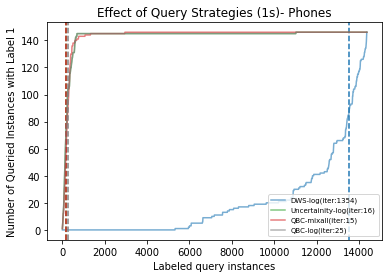

In [153]:
plt.plot(p_dnsu['quota'], p_dnsu['total1s_cum'], '#1f77b4',label=p_dns_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_dns)[2], color='#1f77b4',linestyle = '--')

#plt.plot(p_dnsu['quota'], p_ranu['total1s_cum'], 'gold',label=p_dns_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_random)[2], color='gold',linestyle = '--')

#plt.plot(p_dnsu['quota'], p_un_dtu['total1s_cum'], '#ff7f0e',label=p_un_dtu_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(p_dnsu['quota'], p_un_logu['total1s_cum'], '#2ca02c',label=p_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(p_dnsu['quota'], p_qbc_mixu['total1s_cum'], '#d62728',label=p_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_mix)[2], color='#d62728',linestyle = '--')

#plt.plot(p_dnsu['quota'], p_qbc_dtu['total1s_cum'], '#9467bd',label=p_qbc_dt_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_qbc_dt)[2], color='#9467bd',linestyle = '--')

#plt.plot(p_dnsu['quota'], p_qbc_svmu['total1s_cum'], '#17becf',label=p_qbc_svm_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_qbc_svm)[2], color='#17becf',linestyle = '--')

#plt.plot(p_dnsu['quota'], p_un_refu['total1s_cum'], '#e377c2',label=p_un_ref_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(p_dnsu['quota'], p_qbc_logu['total1s_cum'], '#7f7f7f',label=p_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_log)[2], color='#7f7f7f',linestyle = '--')

#plt.plot(p_dnsu['quota'], p_un_svmu['total1s_cum'], '#bcbd22',label=p_un_svm_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (1s)- Phones')
plt.xlabel('Labeled query instances')
plt.ylabel('Number of Queried Instances with Label 1')
plt.legend(loc='lower right', prop={'size': 7})
           #bbox_to_anchor=(1.65, 0.2))
#plt.xlim(0,14000)
#plt.ylim(0, 1)
plt.savefig('Query_Effect_1s_Phone.png')

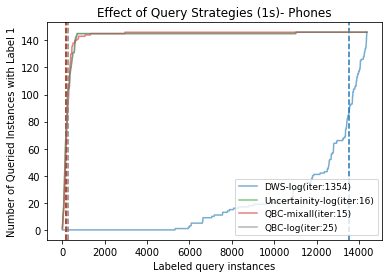

In [154]:
plt.plot(p_dnsu['quota'], p_dnsu['total1s_cum'], '#1f77b4',label=p_dns_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_dns)[2], color='#1f77b4',linestyle = '--')

#plt.plot(p_dnsu['quota'], p_ranu['total1s_cum'], 'gold',label=p_dns_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_random)[2], color='gold',linestyle = '--')

#plt.plot(p_dnsu['quota'], p_un_dtu['total1s_cum'], '#ff7f0e',label=p_un_dtu_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(p_dnsu['quota'], p_un_logu['total1s_cum'], '#2ca02c',label=p_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(p_dnsu['quota'], p_qbc_mixu['total1s_cum'], '#d62728',label=p_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_mix)[2], color='#d62728',linestyle = '--')

#plt.plot(p_dnsu['quota'], p_qbc_dtu['total1s_cum'], '#9467bd',label=p_qbc_dt_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_qbc_dt)[2], color='#9467bd',linestyle = '--')

#plt.plot(p_dnsu['quota'], p_qbc_svmu['total1s_cum'], '#17becf',label=p_qbc_svm_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_qbc_svm)[2], color='#17becf',linestyle = '--')

#plt.plot(p_dnsu['quota'], p_un_refu['total1s_cum'], '#e377c2',label=p_un_ref_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(p_dnsu['quota'], p_qbc_logu['total1s_cum'], '#7f7f7f',label=p_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_log)[2], color='#7f7f7f',linestyle = '--')

#plt.plot(p_dnsu['quota'], p_un_svmu['total1s_cum'], '#bcbd22',label=p_un_svm_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (1s)- Phones')
plt.xlabel('Labeled query instances')
plt.ylabel('Number of Queried Instances with Label 1')
plt.legend(loc='lower right', prop={'size': 9})
           #bbox_to_anchor=(1.65, 0.2))
#plt.xlim(0,14000)
#plt.ylim(0, 1)
plt.savefig('Query_Effect_1s_Phone_closeup.png')

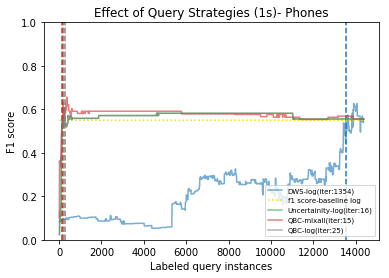

In [155]:
plt.plot(p_dnsu['quota'], p_dnsu['f1_score'], '#1f77b4',label=p_dns_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_dns)[2], color='#1f77b4',linestyle = '--')

plt.plot(p_dnsu['quota'], [get_labels(all_res,p_dns)[0]] * (len(p_dnsu['quota'])), 'gold',linestyle = ':',label='f1 score-baseline log')

#plt.plot(p_un_dtu['quota'], p_un_dtu['f1_score'], '#ff7f0e',label=p_un_dtu_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(p_un_dtu['quota'], p_un_logu['f1_score'], '#2ca02c',label=p_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(p_un_dtu['quota'], p_qbc_mixu['f1_score'], '#d62728',label=p_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_mix)[2], color='#d62728',linestyle = '--')

#plt.plot(p_un_dtu['quota'], p_qbc_dtu['f1_score'], '#9467bd',label=p_qbc_dt_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_qbc_dt)[2], color='#9467bd',linestyle = '--')

#plt.plot(p_un_dtu['quota'], p_qbc_svmu['f1_score'], '#17becf',label=p_qbc_svm_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_qbc_svm)[2], color='#17becf',linestyle = '--')

#plt.plot(p_un_dtu['quota'], p_un_refu['f1_score'], '#e377c2',label=p_un_ref_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(p_un_dtu['quota'], p_qbc_logu['f1_score'], '#7f7f7f',label=p_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_log)[2], color='#7f7f7f',linestyle = '--')

#plt.plot(p_un_dtu['quota'], p_un_svmu['f1_score'], '#bcbd22',label=p_un_svm_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (1s)- Phones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 score')
plt.legend(loc='lower right', prop={'size': 7})
           #bbox_to_anchor=(1.65, 0.2))
#plt.xlim(0,5000)
plt.ylim(0, 1)
plt.savefig('Query_Effect_1s_Phone2.png')

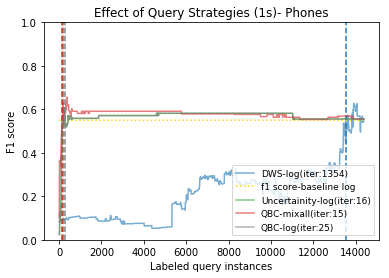

In [156]:
plt.plot(p_dnsu['quota'], p_dnsu['f1_score'], '#1f77b4',label=p_dns_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_dns)[2], color='#1f77b4',linestyle = '--')

plt.plot(p_dnsu['quota'], [get_labels(all_res,p_dns)[0]] * (len(p_dnsu['quota'])), 'gold',linestyle = ':',label='f1 score-baseline log')

#plt.plot(p_un_dtu['quota'], p_un_dtu['f1_score'], '#ff7f0e',label=p_un_dtu_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(p_un_dtu['quota'], p_un_logu['f1_score'], '#2ca02c',label=p_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(p_un_dtu['quota'], p_qbc_mixu['f1_score'], '#d62728',label=p_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_mix)[2], color='#d62728',linestyle = '--')

#plt.plot(p_un_dtu['quota'], p_qbc_dtu['f1_score'], '#9467bd',label=p_qbc_dt_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_qbc_dt)[2], color='#9467bd',linestyle = '--')

#plt.plot(p_un_dtu['quota'], p_qbc_svmu['f1_score'], '#17becf',label=p_qbc_svm_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_qbc_svm)[2], color='#17becf',linestyle = '--')

#plt.plot(p_un_dtu['quota'], p_un_refu['f1_score'], '#e377c2',label=p_un_ref_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(p_un_dtu['quota'], p_qbc_logu['f1_score'], '#7f7f7f',label=p_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_log)[2], color='#7f7f7f',linestyle = '--')

#plt.plot(p_un_dtu['quota'], p_un_svmu['f1_score'], '#bcbd22',label=p_un_svm_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,p_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (1s)- Phones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 score')
plt.legend(loc='lower right', prop={'size': 9})
           #bbox_to_anchor=(1.65, 0.2))
#plt.xlim(0,5000)
plt.ylim(0, 1)
plt.savefig('Query_Effect_1s_Phone2_closeup.png')

(All models)

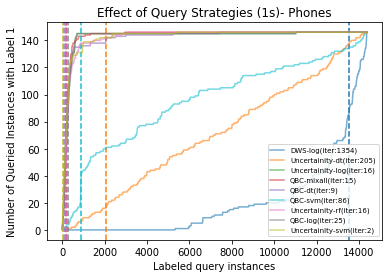

In [157]:
plt.plot(p_dnsu['quota'], p_dnsu['total1s_cum'], '#1f77b4',label=p_dns_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_dns)[2], color='#1f77b4',linestyle = '--')

plt.plot(p_dnsu['quota'], p_un_dtu['total1s_cum'], '#ff7f0e',label=p_un_dtu_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(p_dnsu['quota'], p_un_logu['total1s_cum'], '#2ca02c',label=p_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(p_dnsu['quota'], p_qbc_mixu['total1s_cum'], '#d62728',label=p_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_mix)[2], color='#d62728',linestyle = '--')

plt.plot(p_dnsu['quota'], p_qbc_dtu['total1s_cum'], '#9467bd',label=p_qbc_dt_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_dt)[2], color='#9467bd',linestyle = '--')

plt.plot(p_dnsu['quota'], p_qbc_svmu['total1s_cum'], '#17becf',label=p_qbc_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_svm)[2], color='#17becf',linestyle = '--')

plt.plot(p_dnsu['quota'], p_un_refu['total1s_cum'], '#e377c2',label=p_un_ref_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(p_dnsu['quota'], p_qbc_logu['total1s_cum'], '#7f7f7f',label=p_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_log)[2], color='#7f7f7f',linestyle = '--')

plt.plot(p_dnsu['quota'], p_un_svmu['total1s_cum'], '#bcbd22',label=p_un_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (1s)- Phones')
plt.xlabel('Labeled query instances')
plt.ylabel('Number of Queried Instances with Label 1')
plt.legend(loc='lower right', prop={'size': 7})
           #bbox_to_anchor=(1.65, 0.2))
#plt.xlim(0,14000)
#plt.ylim(0, 1)
plt.savefig('Query_Effect_1s_Phone_all.png')

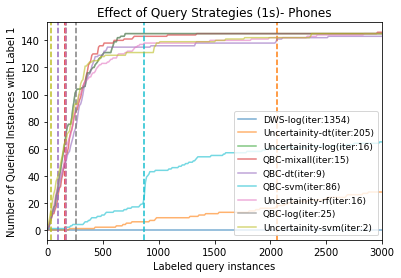

In [158]:
plt.plot(p_dnsu['quota'], p_dnsu['total1s_cum'], '#1f77b4',label=p_dns_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_dns)[2], color='#1f77b4',linestyle = '--')

plt.plot(p_dnsu['quota'], p_un_dtu['total1s_cum'], '#ff7f0e',label=p_un_dtu_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(p_dnsu['quota'], p_un_logu['total1s_cum'], '#2ca02c',label=p_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(p_dnsu['quota'], p_qbc_mixu['total1s_cum'], '#d62728',label=p_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_mix)[2], color='#d62728',linestyle = '--')

plt.plot(p_dnsu['quota'], p_qbc_dtu['total1s_cum'], '#9467bd',label=p_qbc_dt_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_dt)[2], color='#9467bd',linestyle = '--')

plt.plot(p_dnsu['quota'], p_qbc_svmu['total1s_cum'], '#17becf',label=p_qbc_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_svm)[2], color='#17becf',linestyle = '--')

plt.plot(p_dnsu['quota'], p_un_refu['total1s_cum'], '#e377c2',label=p_un_ref_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(p_dnsu['quota'], p_qbc_logu['total1s_cum'], '#7f7f7f',label=p_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_log)[2], color='#7f7f7f',linestyle = '--')

plt.plot(p_dnsu['quota'], p_un_svmu['total1s_cum'], '#bcbd22',label=p_un_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (1s)- Phones')
plt.xlabel('Labeled query instances')
plt.ylabel('Number of Queried Instances with Label 1')
plt.legend(loc='lower right', prop={'size': 9})
           #bbox_to_anchor=(1.65, 0.2))
plt.xlim(0,3000)
#plt.ylim(0, 1)
plt.savefig('Query_Effect_1s_Phone_all_closeup.png')

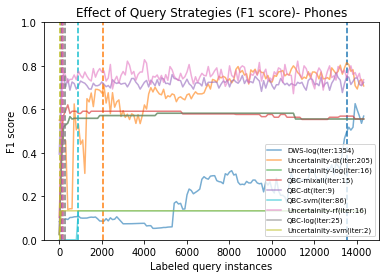

In [159]:
plt.plot(p_dnsu.iloc[::10, :]['quota'], p_dnsu.iloc[::10, :]['f1_score'], '#1f77b4',label=p_dns_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_dns)[2], color='#1f77b4',linestyle = '--')

plt.plot(p_un_dtu.iloc[::10, :]['quota'], p_un_dtu.iloc[::10, :]['f1_score'], '#ff7f0e',label=p_un_dtu_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(p_un_dtu.iloc[::10, :]['quota'], p_un_logu.iloc[::10, :]['f1_score'], '#2ca02c',label=p_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(p_un_dtu.iloc[::10, :]['quota'], p_qbc_mixu.iloc[::10, :]['f1_score'], '#d62728',label=p_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_mix)[2], color='#d62728',linestyle = '--')

plt.plot(p_un_dtu.iloc[::10, :]['quota'], p_qbc_dtu.iloc[::10, :]['f1_score'], '#9467bd',label=p_qbc_dt_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_dt)[2], color='#9467bd',linestyle = '--')

plt.plot(p_un_dtu.iloc[::10, :]['quota'], p_qbc_svmu.iloc[::10, :]['f1_score'], '#17becf',label=p_qbc_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_svm)[2], color='#17becf',linestyle = '--')

plt.plot(p_un_dtu.iloc[::10, :]['quota'], p_un_refu.iloc[::10, :]['f1_score'], '#e377c2',label=p_un_ref_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(p_un_dtu.iloc[::10, :]['quota'], p_qbc_logu.iloc[::10, :]['f1_score'], '#7f7f7f',label=p_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_log)[2], color='#7f7f7f',linestyle = '--')

plt.plot(p_un_dtu.iloc[::10, :]['quota'], p_un_svmu.iloc[::10, :]['f1_score'], '#bcbd22',label=p_un_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (F1 score)- Phones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 score')
plt.legend(loc='lower right', prop={'size': 7})
           #bbox_to_anchor=(1.65, 0.2))
#plt.xlim(0,1000)
plt.ylim(0, 1)
plt.savefig('Query_Effect_f1_Phone2_all.png')

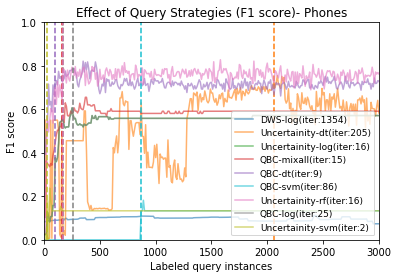

In [160]:
plt.plot(p_dnsu.iloc[::1, :]['quota'], p_dnsu.iloc[::1, :]['f1_score'], '#1f77b4',label=p_dns_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_dns)[2], color='#1f77b4',linestyle = '--')

plt.plot(p_un_dtu.iloc[::1, :]['quota'], p_un_dtu.iloc[::1, :]['f1_score'], '#ff7f0e',label=p_un_dtu_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(p_un_dtu.iloc[::1, :]['quota'], p_un_logu.iloc[::1, :]['f1_score'], '#2ca02c',label=p_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(p_un_dtu.iloc[::1, :]['quota'], p_qbc_mixu.iloc[::1, :]['f1_score'], '#d62728',label=p_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_mix)[2], color='#d62728',linestyle = '--')

plt.plot(p_un_dtu.iloc[::1, :]['quota'], p_qbc_dtu.iloc[::1, :]['f1_score'], '#9467bd',label=p_qbc_dt_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_dt)[2], color='#9467bd',linestyle = '--')

plt.plot(p_un_dtu.iloc[::1, :]['quota'], p_qbc_svmu.iloc[::1, :]['f1_score'], '#17becf',label=p_qbc_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_svm)[2], color='#17becf',linestyle = '--')

plt.plot(p_un_dtu.iloc[::1, :]['quota'], p_un_refu.iloc[::1, :]['f1_score'], '#e377c2',label=p_un_ref_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(p_un_dtu.iloc[::1, :]['quota'], p_qbc_logu.iloc[::1, :]['f1_score'], '#7f7f7f',label=p_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_qbc_log)[2], color='#7f7f7f',linestyle = '--')

plt.plot(p_un_dtu.iloc[::1, :]['quota'], p_un_svmu.iloc[::1, :]['f1_score'], '#bcbd22',label=p_un_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,p_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (F1 score)- Phones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 score')
plt.legend(loc='lower right', prop={'size': 9})
           #bbox_to_anchor=(1.65, 0.2))
plt.xlim(0,3000)
plt.ylim(0, 1)
plt.savefig('Query_Effect_f1_Phone2_all_closeup.png')

- Headphones

In [161]:
#hp_dns='Faster_HeadPhone_opt4_all_dns_log_10'
#hp_dnsu=get_dataset(hp_dns, k=np.NaN)
#hp_dns_lb = 'DWS-log(iter:'+str(get_labels(all_res,hp_dns)[1])+')'

hp_un_dt='Faster_HeadPhone_opt4_all_uncertainity_dt_10'
hp_un_dtu=get_dataset(hp_un_dt, k=np.NaN)
hp_un_dtu_lb = 'Uncertainity-dt(iter:'+str(get_labels(all_res,hp_un_dt)[1])+')'

hp_un_log='Faster_HeadPhone_opt4_all_uncertainity_log_10'
hp_un_logu=get_dataset(hp_un_log, k=np.NaN)
hp_un_log_lb = 'Uncertainity-log(iter:'+str(get_labels(all_res,hp_un_log)[1])+')'

hp_qbc_mix='Faster_HeadPhone_opt4_all_qbc_mixall_10'
hp_qbc_mixu=get_dataset(hp_qbc_mix, k=np.NaN)
hp_qbc_mix_lb = 'QBC-mixall(iter:'+str(get_labels(all_res,hp_qbc_mix)[1])+')'

hp_qbc_log='Faster_HeadPhone_opt4_all_qbc_onlylog_10'
hp_qbc_logu=get_dataset(hp_un_log, k=np.NaN)
hp_qbc_log_lb = 'QBC-log(iter:'+str(get_labels(all_res,hp_qbc_log)[1])+')'

hp_qbc_dt='Faster_HeadPhone_opt4_all_qbc_onlydt_10'
hp_qbc_dtu=get_dataset(hp_qbc_dt, k=np.NaN)
hp_qbc_dt_lb = 'QBC-dt(iter:'+str(get_labels(all_res,hp_qbc_dt)[1])+')'

hp_qbc_svm='Faster_HeadPhone_opt4_all_qbc_onlysvm_10'
hp_qbc_svmu=get_dataset(hp_qbc_svm, k=np.NaN)
hp_qbc_svm_lb = 'QBC-svm(iter:'+str(get_labels(all_res,hp_qbc_svm)[1])+')'

hp_un_ref='Faster_HeadPhone_opt4_all_uncertainity_rf_10'
hp_un_refu=get_dataset(hp_un_ref, k=np.NaN)
hp_un_ref_lb = 'Uncertainity-rf(iter:'+str(get_labels(all_res,hp_un_ref)[1])+')'

hp_un_svm='Faster_HeadPhone_opt4_all_uncertainity_svm_10'
hp_un_svmu=get_dataset(hp_un_svm, k=np.NaN)
hp_un_svm_lb = 'Uncertainity-svm(iter:'+str(get_labels(all_res,hp_un_svm)[1])+')'

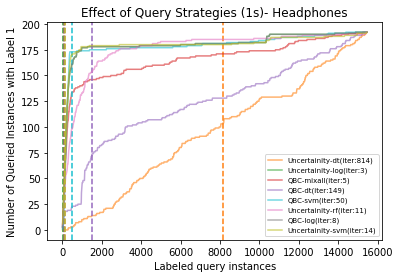

In [164]:
#plt.plot(hp_dnsu['quota'], hp_dnsu['total1s_cum'], '#1f77b4',label=hp_dns_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,hp_dns)[2], color='#1f77b4',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_un_dtu['total1s_cum'], '#ff7f0e',label=hp_un_dtu_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_un_logu['total1s_cum'], '#2ca02c',label=hp_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_qbc_mixu['total1s_cum'], '#d62728',label=hp_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_mix)[2], color='#d62728',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_qbc_dtu['total1s_cum'], '#9467bd',label=hp_qbc_dt_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_dt)[2], color='#9467bd',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_qbc_svmu['total1s_cum'], '#17becf',label=hp_qbc_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_svm)[2], color='#17becf',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_un_refu['total1s_cum'], '#e377c2',label=hp_un_ref_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_qbc_logu['total1s_cum'], '#7f7f7f',label=hp_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_log)[2], color='#7f7f7f',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_un_svmu['total1s_cum'], '#bcbd22',label=hp_un_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (1s)- Headphones')
plt.xlabel('Labeled query instances')
plt.ylabel('Number of Queried Instances with Label 1')
plt.legend(loc='lower right', prop={'size': 7})
           #bbox_to_anchor=(1.65, 0.2))
#plt.xlim(0,14000)
#plt.ylim(0, 1)
plt.savefig('Query_Effect_1s_Headphone_all.png')

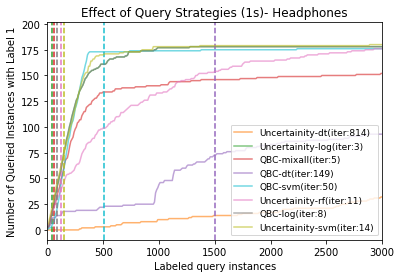

In [165]:
#plt.plot(hp_dnsu['quota'], hp_dnsu['total1s_cum'], '#1f77b4',label=hp_dns_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,hp_dns)[2], color='#1f77b4',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_un_dtu['total1s_cum'], '#ff7f0e',label=hp_un_dtu_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_un_logu['total1s_cum'], '#2ca02c',label=hp_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_qbc_mixu['total1s_cum'], '#d62728',label=hp_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_mix)[2], color='#d62728',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_qbc_dtu['total1s_cum'], '#9467bd',label=hp_qbc_dt_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_dt)[2], color='#9467bd',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_qbc_svmu['total1s_cum'], '#17becf',label=hp_qbc_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_svm)[2], color='#17becf',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_un_refu['total1s_cum'], '#e377c2',label=hp_un_ref_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_qbc_logu['total1s_cum'], '#7f7f7f',label=hp_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_log)[2], color='#7f7f7f',linestyle = '--')

plt.plot(hp_un_dtu['quota'], hp_un_svmu['total1s_cum'], '#bcbd22',label=hp_un_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (1s)- Headphones')
plt.xlabel('Labeled query instances')
plt.ylabel('Number of Queried Instances with Label 1')
plt.legend(loc='lower right', prop={'size': 9})
           #bbox_to_anchor=(1.65, 0.2))
plt.xlim(0,3000)
#plt.ylim(0, 1)
plt.savefig('Query_Effect_1s_Headphone_all_closeup.png')

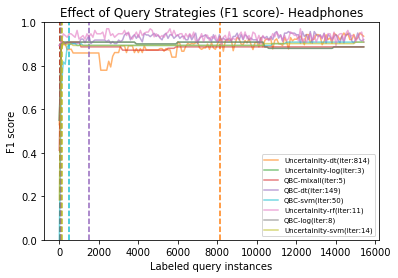

In [166]:
#plt.plot(hp_dnsu['quota'], hp_dnsu['f1_score'], '#1f77b4',label=hp_dns_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,hp_dns)[2], color='#1f77b4',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::10, :]['quota'], hp_un_dtu.iloc[::10, :]['f1_score'], '#ff7f0e',label=hp_un_dtu_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::10, :]['quota'], hp_un_logu.iloc[::10, :]['f1_score'], '#2ca02c',label=hp_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::10, :]['quota'], hp_qbc_mixu.iloc[::10, :]['f1_score'], '#d62728',label=hp_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_mix)[2], color='#d62728',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::10, :]['quota'], hp_qbc_dtu.iloc[::10, :]['f1_score'], '#9467bd',label=hp_qbc_dt_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_dt)[2], color='#9467bd',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::10, :]['quota'], hp_qbc_svmu.iloc[::10, :]['f1_score'], '#17becf',label=hp_qbc_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_svm)[2], color='#17becf',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::10, :]['quota'], hp_un_refu.iloc[::10, :]['f1_score'], '#e377c2',label=hp_un_ref_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::10, :]['quota'], hp_qbc_logu.iloc[::10, :]['f1_score'], '#7f7f7f',label=hp_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_log)[2], color='#7f7f7f',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::10, :]['quota'], hp_un_svmu.iloc[::10, :]['f1_score'], '#bcbd22',label=hp_un_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (F1 score)- Headphones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 score')
plt.legend(loc='lower right', prop={'size': 7})
           #bbox_to_anchor=(1.65, 0.2))
#plt.xlim(0,9000)
plt.ylim(0, 1)
plt.savefig('Query_Effect_f1_Headphone2_all.png')

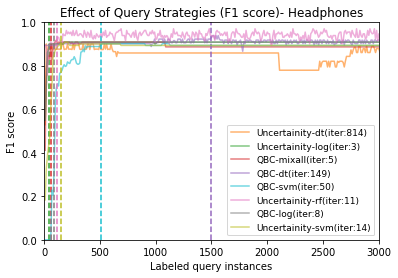

In [167]:
#plt.plot(hp_dnsu['quota'], hp_dnsu['f1_score'], '#1f77b4',label=hp_dns_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,hp_dns)[2], color='#1f77b4',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::1, :]['quota'], hp_un_dtu.iloc[::1, :]['f1_score'], '#ff7f0e',label=hp_un_dtu_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::1, :]['quota'], hp_un_logu.iloc[::1, :]['f1_score'], '#2ca02c',label=hp_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::1, :]['quota'], hp_qbc_mixu.iloc[::1, :]['f1_score'], '#d62728',label=hp_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_mix)[2], color='#d62728',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::1, :]['quota'], hp_qbc_dtu.iloc[::1, :]['f1_score'], '#9467bd',label=hp_qbc_dt_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_dt)[2], color='#9467bd',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::1, :]['quota'], hp_qbc_svmu.iloc[::1, :]['f1_score'], '#17becf',label=hp_qbc_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_svm)[2], color='#17becf',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::1, :]['quota'], hp_un_refu.iloc[::1, :]['f1_score'], '#e377c2',label=hp_un_ref_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::1, :]['quota'], hp_qbc_logu.iloc[::1, :]['f1_score'], '#7f7f7f',label=hp_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_qbc_log)[2], color='#7f7f7f',linestyle = '--')

plt.plot(hp_un_dtu.iloc[::1, :]['quota'], hp_un_svmu.iloc[::1, :]['f1_score'], '#bcbd22',label=hp_un_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,hp_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (F1 score)- Headphones')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 score')
plt.legend(loc='lower right', prop={'size': 9})
           #bbox_to_anchor=(1.65, 0.2))
plt.xlim(0,3000)
plt.ylim(0, 1)
plt.savefig('Query_Effect_f1_Headphone2_all_closeup.png')

- TVs

In [168]:
#tv_dns='Faster_TVs_opt4_all_dns_log_10'
#tv_dnsu=get_dataset(tv_dns, k=np.NaN)
#tv_dns_lb = 'DWS-log(iter:'+str(get_labels(all_res,tv_dns)[1])+')'

tv_un_dt='Faster_TVs_opt4_all_uncertainity_dt_10'
tv_un_dtu=get_dataset(tv_un_dt, k=np.NaN)
tv_un_dtu_lb = 'Uncertainity-dt(iter:'+str(get_labels(all_res,tv_un_dt)[1])+')'

tv_un_log='Faster_TVs_opt4_all_uncertainity_log_10'
tv_un_logu=get_dataset(tv_un_log, k=np.NaN)
tv_un_log_lb = 'Uncertainity-log(iter:'+str(get_labels(all_res,tv_un_log)[1])+')'

tv_qbc_mix='Faster_TVs_opt4_all_qbc_mixall_10'
tv_qbc_mixu=get_dataset(tv_qbc_mix, k=np.NaN)
tv_qbc_mix_lb = 'QBC-mixall(iter:'+str(get_labels(all_res,tv_qbc_mix)[1])+')'

tv_qbc_log='Faster_TVs_opt4_all_qbc_onlylog_10'
tv_qbc_logu=get_dataset(tv_un_log, k=np.NaN)
tv_qbc_log_lb = 'QBC-log(iter:'+str(get_labels(all_res,tv_qbc_log)[1])+')'

tv_qbc_dt='Faster_TVs_opt4_all_qbc_onlydt_10'
tv_qbc_dtu=get_dataset(tv_qbc_dt, k=np.NaN)
tv_qbc_dt_lb = 'QBC-dt(iter:'+str(get_labels(all_res,tv_qbc_dt)[1])+')'

tv_qbc_svm='Faster_TVs_opt4_all_qbc_onlysvm_10'
tv_qbc_svmu=get_dataset(tv_qbc_svm, k=np.NaN)
tv_qbc_svm_lb = 'QBC-svm(iter:'+str(get_labels(all_res,tv_qbc_svm)[1])+')'

tv_un_ref='Faster_TVs_opt4_all_uncertainity_rf_10'
tv_un_refu=get_dataset(tv_un_ref, k=np.NaN)
tv_un_ref_lb = 'Uncertainity-rf(iter:'+str(get_labels(all_res,tv_un_ref)[1])+')'

tv_un_svm='Faster_TVs_opt4_all_uncertainity_svm_10'
tv_un_svmu=get_dataset(tv_un_svm, k=np.NaN)
tv_un_svm_lb = 'Uncertainity-svm(iter:'+str(get_labels(all_res,tv_un_svm)[1])+')'

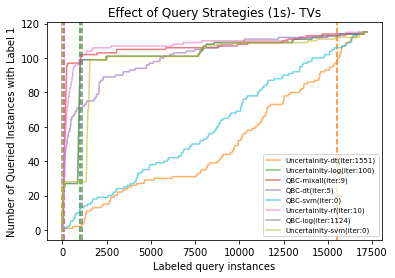

In [175]:
#plt.plot(hp_dnsu['quota'], hp_dnsu['total1s_cum'], '#1f77b4',label=hp_dns_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,hp_dns)[2], color='#1f77b4',linestyle = '--')

plt.plot(tv_un_dtu['quota'], tv_un_dtu['total1s_cum'], '#ff7f0e',label=tv_un_dtu_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(tv_un_dtu['quota'], tv_un_logu['total1s_cum'], '#2ca02c',label=tv_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(tv_un_dtu['quota'], tv_qbc_mixu['total1s_cum'], '#d62728',label=tv_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_qbc_mix)[2], color='#d62728',linestyle = '--')

plt.plot(tv_un_dtu['quota'], tv_qbc_dtu['total1s_cum'], '#9467bd',label=tv_qbc_dt_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_qbc_dt)[2], color='#9467bd',linestyle = '--')

plt.plot(tv_un_dtu['quota'], tv_qbc_svmu['total1s_cum'], '#17becf',label=tv_qbc_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_qbc_svm)[2], color='#17becf',linestyle = '--')

plt.plot(tv_un_dtu['quota'], tv_un_refu['total1s_cum'], '#e377c2',label=tv_un_ref_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(tv_un_dtu['quota'], tv_qbc_logu['total1s_cum'], '#7f7f7f',label=tv_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_qbc_log)[2], color='#7f7f7f',linestyle = '--')

plt.plot(tv_un_dtu['quota'], tv_un_svmu['total1s_cum'], '#bcbd22',label=tv_un_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (1s)- TVs')
plt.xlabel('Labeled query instances')
plt.ylabel('Number of Queried Instances with Label 1')
plt.legend(loc='lower right', prop={'size': 7})
           #bbox_to_anchor=(1.65, 0.2))
#plt.xlim(0,14000)
#plt.ylim(0, 1)
plt.savefig('Query_Effect_1s_tv_all.png')

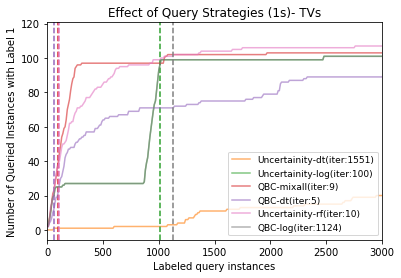

In [178]:
#plt.plot(hp_dnsu['quota'], hp_dnsu['total1s_cum'], '#1f77b4',label=hp_dns_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,hp_dns)[2], color='#1f77b4',linestyle = '--')

plt.plot(tv_un_dtu['quota'], tv_un_dtu['total1s_cum'], '#ff7f0e',label=tv_un_dtu_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(tv_un_dtu['quota'], tv_un_logu['total1s_cum'], '#2ca02c',label=tv_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(tv_un_dtu['quota'], tv_qbc_mixu['total1s_cum'], '#d62728',label=tv_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_qbc_mix)[2], color='#d62728',linestyle = '--')

plt.plot(tv_un_dtu['quota'], tv_qbc_dtu['total1s_cum'], '#9467bd',label=tv_qbc_dt_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_qbc_dt)[2], color='#9467bd',linestyle = '--')

#plt.plot(tv_un_dtu['quota'], tv_qbc_svmu['total1s_cum'], '#17becf',label=tv_qbc_svm_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,tv_qbc_svm)[2], color='#17becf',linestyle = '--')

plt.plot(tv_un_dtu['quota'], tv_un_refu['total1s_cum'], '#e377c2',label=tv_un_ref_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(tv_un_dtu['quota'], tv_qbc_logu['total1s_cum'], '#7f7f7f',label=tv_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_qbc_log)[2], color='#7f7f7f',linestyle = '--')

#plt.plot(tv_un_dtu['quota'], tv_un_svmu['total1s_cum'], '#bcbd22',label=tv_un_svm_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,tv_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (1s)- TVs')
plt.xlabel('Labeled query instances')
plt.ylabel('Number of Queried Instances with Label 1')
plt.legend(loc='lower right', prop={'size': 9})
           #bbox_to_anchor=(1.65, 0.2))
plt.xlim(0,3000)
#plt.ylim(0, 1)
plt.savefig('Query_Effect_1s_tv_all_closeup.png')

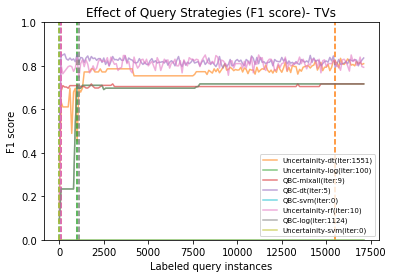

In [171]:
plt.plot(tv_un_dtu.iloc[::10, :]['quota'], tv_un_dtu.iloc[::10, :]['f1_score'], '#ff7f0e',label=tv_un_dtu_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(tv_un_dtu.iloc[::10, :]['quota'], tv_un_logu.iloc[::10, :]['f1_score'], '#2ca02c',label=tv_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(tv_un_dtu.iloc[::10, :]['quota'], tv_qbc_mixu.iloc[::10, :]['f1_score'], '#d62728',label=tv_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_qbc_mix)[2], color='#d62728',linestyle = '--')

plt.plot(tv_un_dtu.iloc[::10, :]['quota'], tv_qbc_dtu.iloc[::10, :]['f1_score'], '#9467bd',label=tv_qbc_dt_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_qbc_dt)[2], color='#9467bd',linestyle = '--')

plt.plot(tv_un_dtu.iloc[::10, :]['quota'], tv_qbc_svmu.iloc[::10, :]['f1_score'], '#17becf',label=tv_qbc_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_qbc_svm)[2], color='#17becf',linestyle = '--')

plt.plot(tv_un_dtu.iloc[::10, :]['quota'], tv_un_refu.iloc[::10, :]['f1_score'], '#e377c2',label=tv_un_ref_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(tv_un_dtu.iloc[::10, :]['quota'], tv_qbc_logu.iloc[::10, :]['f1_score'], '#7f7f7f',label=tv_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_qbc_log)[2], color='#7f7f7f',linestyle = '--')

plt.plot(tv_un_dtu.iloc[::10, :]['quota'], tv_un_svmu.iloc[::10, :]['f1_score'], '#bcbd22',label=tv_un_svm_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (F1 score)- TVs')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 score')
plt.legend(loc='lower right', prop={'size': 7})
           #bbox_to_anchor=(1.65, 0.2))
#plt.xlim(0,9000)
plt.ylim(0, 1)
plt.savefig('Query_Effect_f1_tv2_all.png')

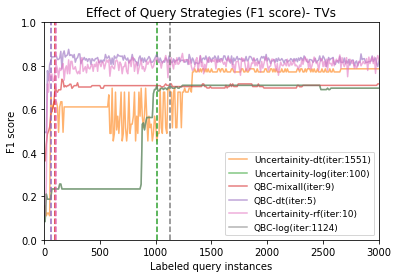

In [179]:
plt.plot(tv_un_dtu.iloc[::1, :]['quota'], tv_un_dtu.iloc[::1, :]['f1_score'], '#ff7f0e',label=tv_un_dtu_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_un_dt)[2], color='#ff7f0e',linestyle = '--')

plt.plot(tv_un_dtu.iloc[::1, :]['quota'], tv_un_logu.iloc[::1, :]['f1_score'], '#2ca02c',label=tv_un_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_un_log)[2], color='#2ca02c',linestyle = '--')

plt.plot(tv_un_dtu.iloc[::1, :]['quota'], tv_qbc_mixu.iloc[::1, :]['f1_score'], '#d62728',label=tv_qbc_mix_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_qbc_mix)[2], color='#d62728',linestyle = '--')

plt.plot(tv_un_dtu.iloc[::1, :]['quota'], tv_qbc_dtu.iloc[::1, :]['f1_score'], '#9467bd',label=tv_qbc_dt_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_qbc_dt)[2], color='#9467bd',linestyle = '--')

#plt.plot(tv_un_dtu.iloc[::1, :]['quota'], tv_qbc_svmu.iloc[::1, :]['f1_score'], '#17becf',label=tv_qbc_svm_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,tv_qbc_svm)[2], color='#17becf',linestyle = '--')

plt.plot(tv_un_dtu.iloc[::1, :]['quota'], tv_un_refu.iloc[::1, :]['f1_score'], '#e377c2',label=tv_un_ref_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_un_ref)[2], color='#e377c2',linestyle = '--')

plt.plot(tv_un_dtu.iloc[::1, :]['quota'], tv_qbc_logu.iloc[::1, :]['f1_score'], '#7f7f7f',label=tv_qbc_log_lb,alpha=0.6)
plt.axvline(x=get_labels(all_res,tv_qbc_log)[2], color='#7f7f7f',linestyle = '--')

#plt.plot(tv_un_dtu.iloc[::1, :]['quota'], tv_un_svmu.iloc[::1, :]['f1_score'], '#bcbd22',label=tv_un_svm_lb,alpha=0.6)
#plt.axvline(x=get_labels(all_res,tv_un_svm)[2], color='#bcbd22',linestyle = '--')


plt.title('Effect of Query Strategies (F1 score)- TVs')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 score')
plt.legend(loc='lower right', prop={'size': 9})
           #bbox_to_anchor=(1.65, 0.2))
plt.xlim(0,3000)
plt.ylim(0, 1)
plt.savefig('Query_Effect_f1_tv2_all_closeup.png')

- Recall & 

In [28]:
p_qbc_mixu['recall']= p_qbc_mixu['tp']/(p_qbc_mixu['tp']+p_qbc_mixu['fn'])
p_qbc_mixu['precision']= p_qbc_mixu['tp']/(p_qbc_mixu['tp']+p_qbc_mixu['fp'])

In [35]:
p_qbc_mixu.head(1000)

,Unnamed: 0,iter,quota,f1_score,tn,fp,fn,tp,id_index,label,total1s,total1s_cum,recall,precision
0,0,0,10,0.103093,6989,22,65,5,"[7893, 2142, 1546, 6360, 11351, 5967, 9341, 17...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",1,1,0.071429,0.185185
1,1,1,20,0.363636,6991,20,50,20,"[7694, 4767, 9634, 7373, 1385, 4978, 10058, 82...","[1, 0, 1, 0, 0, 1, 0, 0, 0, 0]",3,4,0.285714,0.500000
2,2,2,30,0.350877,6987,24,50,20,"[164, 12102, 2342, 1328, 5202, 4956, 12167, 13...","[0, 0, 0, 0, 1, 1, 0, 0, 1, 0]",3,7,0.285714,0.454545
3,3,3,40,0.344828,6985,26,50,20,"[10376, 10710, 13274, 10009, 5512, 8505, 9805,...","[0, 0, 1, 0, 0, 0, 1, 0, 0, 0]",2,9,0.285714,0.434783
4,4,4,50,0.336000,6977,34,49,21,"[11859, 1615, 9858, 9110, 13229, 17, 7042, 444...","[0, 0, 0, 1, 1, 0, 0, 0, 1, 0]",3,12,0.300000,0.381818
5,5,5,60,0.350877,6987,24,50,20,"[11558, 2353, 2578, 12288, 7886, 9012, 8891, 8...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,12,0.285714,0.454545
6,6,6,70,0.342857,6994,17,52,18,"[11282, 10383, 14302, 12091, 1353, 13038, 8196...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 1]",3,15,0.257143,0.514286
7,7,7,80,0.387755,7002,9,51,19,"[1413, 2658, 7188, 8573, 9468, 3958, 3525, 991...","[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]",2,17,0.271429,0.678571
8,8,8,90,0.412371,7004,7,50,20,"[2429, 540, 1857, 1865, 4919, 12603, 8097, 882...","[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]",4,21,0.285714,0.740741
9,9,9,100,0.450000,6988,23,43,27,"[4421, 759, 3502, 13045, 6429, 3996, 9659, 127...","[0, 1, 0, 1, 0, 1, 0, 1, 1, 1]",6,27,0.385714,0.540000


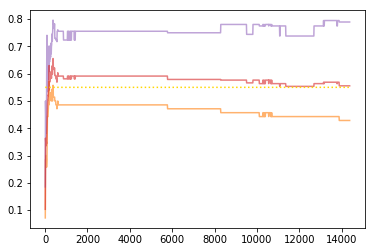

In [34]:
plt.plot(p_qbc_mixu['quota'], p_qbc_mixu['recall'], '#ff7f0e',label=tv_un_dtu_lb,alpha=0.6)
plt.plot(p_qbc_mixu['quota'], p_qbc_mixu['precision'], '#9467bd',label=tv_un_dtu_lb,alpha=0.6)
plt.plot(p_qbc_mixu['quota'], p_qbc_mixu['f1_score'], '#d62728',label=tv_un_dtu_lb,alpha=0.6)
plt.plot(p_qbc_mixu['quota'], [get_labels(all_res,p_qbc_mix)[0]] * (len(p_qbc_mixu['quota'])), 'gold',linestyle = ':',label='f1 score-baseline log')


In [2]:
jac_3=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt3_onlyjac_uncertainity_log_10')
total1=[]
for i in jac_3['label']:
    a=i.replace('[','').replace(']','').split(',')
    total1.append(sum([int(k.strip()) for k in a]))
jac_3['total1s']=total1

In [3]:
jac_3_r=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt3_onlyjac_random_log_10')

In [4]:
jac_3_2=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt3_onlyjac_qbc_onlylog_10')
total1=[]
for i in jac_3_2['label']:
    a=i.replace('[','').replace(']','').split(',')
    total1.append(sum([int(k.strip()) for k in a]))
jac_3_2['total1s']=total1

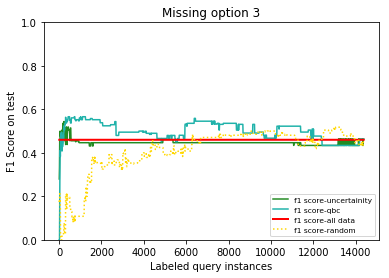

In [5]:
plt.plot(jac_3['quota'], jac_3['f1_score'], 'forestgreen',label='f1 score-uncertainity')
plt.plot(jac_3_2['quota'], jac_3_2['f1_score'], 'lightseagreen',label='f1 score-qbc')
plt.plot(jac_3['quota'], [0.46] * (len(jac_3['quota'])), '-r',linewidth=2, label='f1 score-all data')
plt.plot(jac_3['quota'], jac_3_r['f1_score'], 'gold',linestyle = ':',label='f1 score-random')

plt.title('Missing option 3')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 7.5})
plt.ylim(0, 1)
plt.savefig('Jaccard_opt3.png')

In [6]:
jac_4=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_onlyjac_uncertainity_log_10')
total1=[]
for i in jac_4['label']:
    a=i.replace('[','').replace(']','').split(',')
    total1.append(sum([int(k.strip()) for k in a]))
jac_4['total1s']=total1

In [7]:
jac_4_r=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_onlyjac_random_log_10')

In [8]:
jac_4_2=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_onlyjac_qbc_onlylog_10')
total1=[]
for i in jac_4_2['label']:
    a=i.replace('[','').replace(']','').split(',')
    total1.append(sum([int(k.strip()) for k in a]))
jac_4_2['total1s']=total1

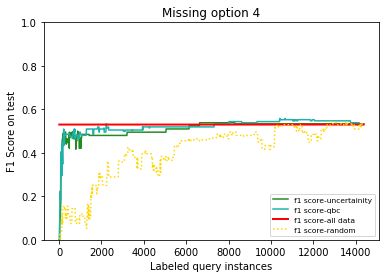

In [9]:
plt.plot(jac_4['quota'], jac_4['f1_score'], 'forestgreen',label='f1 score-uncertainity')
plt.plot(jac_4_2['quota'], jac_4_2['f1_score'], 'lightseagreen',label='f1 score-qbc')
plt.plot(jac_4['quota'], [0.53] * (len(jac_4['quota'])), '-r',linewidth=2, label='f1 score-all data')
plt.plot(jac_4['quota'], jac_4_r['f1_score'], 'gold',linestyle = ':',label='f1 score-random')

plt.title('Missing option 4')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 7.5})
plt.ylim(0, 1)
plt.savefig('Jaccard_opt4.png')

### 2.2.2. Feature Selection Effect

In [10]:
f_all=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_all_uncertainity_log_10')
f_sel=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_fetselect_uncertainity_log_10')
f_jac=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_onlyjac_uncertainity_log_10')
f_lev=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_onlylev_uncertainity_log_10')
f_jar=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_onlyjaro_uncertainity_log_10')

In [11]:
f_all.head()

,Unnamed: 0,iter,quota,f1_score,tn,fp,fn,tp,id_index,label
0,0,0,10,0.024096,6999,12,69,1,"[3221, 13781, 10871, 6765, 129, 5054, 5620, 12...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
1,1,1,20,0.027397,7009,2,69,1,"[6962, 5587, 1413, 4064, 9468, 10853, 13485, 8...","[0, 0, 1, 0, 0, 0, 1, 0, 0, 1]"
2,2,2,30,0.126582,7007,4,65,5,"[10234, 6149, 11231, 4444, 13411, 12629, 2825,...","[1, 0, 0, 0, 0, 0, 1, 1, 0, 0]"
3,3,3,40,0.106667,7010,1,66,4,"[6118, 3064, 14283, 9341, 6206, 804, 9395, 100...","[0, 1, 0, 1, 1, 0, 0, 1, 0, 0]"
4,4,4,50,0.082192,7011,0,67,3,"[9110, 9440, 962, 5923, 8573, 1026, 12665, 784...","[1, 0, 1, 0, 0, 0, 0, 1, 0, 0]"


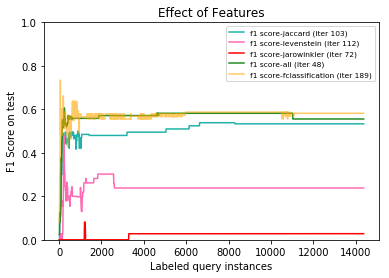

In [12]:
plt.plot(f_all['quota'], f_jac['f1_score'], 'lightseagreen',label='f1 score-jaccard (iter 103)')
plt.plot(f_all['quota'], f_lev['f1_score'], 'hotpink',label='f1 score-levenstein (iter 112)')
plt.plot(f_all['quota'], f_jar['f1_score'], 'red',label='f1 score-jarowinkler (iter 72)')
plt.plot(f_all['quota'], f_all['f1_score'], 'forestgreen',label='f1 score-all (iter 48)')
plt.plot(f_all['quota'], f_sel['f1_score'], 'orange',label='f1 score-fclassification (iter 189)',alpha=0.6)

plt.title('Effect of Features')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='upper right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.savefig('Feature_Effect.png')

### 2.2.3. Query by Selection Effect

- Number of 1s inside QBC

In [13]:
log=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt3_all_qbc_onlylog_10')
total1=[]
for i in log['label']:
    a=i.replace('[','').replace(']','').split(',')
    total1.append(sum([int(k.strip()) for k in a]))
log['total1s']=total1

sm=0
ls=[]
for i in log['total1s']:
    sm=sm+i
    ls.append(sm)

log['total1s_cum']=ls

In [14]:
mix=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt3_all_qbc_mixall_10')
total1=[]
for i in mix['label']:
    a=i.replace('[','').replace(']','').split(',')
    total1.append(sum([int(k.strip()) for k in a]))
mix['total1s']=total1

sm=0
ls=[]
for i in mix['total1s']:
    sm=sm+i
    ls.append(sm)

mix['total1s_cum']=ls

In [15]:
svm=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt3_all_qbc_onlysvm_10')
total1=[]
for i in svm['label']:
    a=i.replace('[','').replace(']','').split(',')
    total1.append(sum([int(k.strip()) for k in a]))
svm['total1s']=total1

sm=0
ls=[]
for i in svm['total1s']:
    sm=sm+i
    ls.append(sm)

svm['total1s_cum']=ls

In [16]:
dt=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt3_all_qbc_onlydt_10')
total1=[]
for i in dt['label']:
    a=i.replace('[','').replace(']','').split(',')
    total1.append(sum([int(k.strip()) for k in a]))
dt['total1s']=total1

sm=0
ls=[]
for i in dt['total1s']:
    sm=sm+i
    ls.append(sm)

dt['total1s_cum']=ls

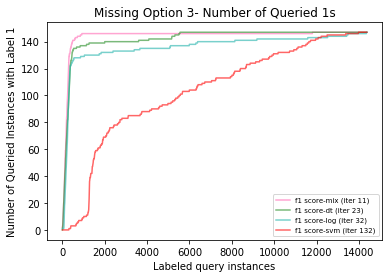

In [17]:
plt.plot(mix['quota'], mix['total1s_cum'], 'hotpink',label='f1 score-mix (iter 11)',alpha=0.6)
plt.plot(dt['quota'], dt['total1s_cum'], 'forestgreen',label='f1 score-dt (iter 23)',alpha=0.6)
plt.plot(log['quota'], log['total1s_cum'], 'lightseagreen',label='f1 score-log (iter 32)',alpha=0.6)
plt.plot(svm['quota'], svm['total1s_cum'], 'red',label='f1 score-svm (iter 132)',alpha=0.6)


plt.title('Missing Option 3- Number of Queried 1s')
plt.xlabel('Labeled query instances')
plt.ylabel('Number of Queried Instances with Label 1')
plt.legend(loc='lower right', prop={'size': 7})
           #bbox_to_anchor=(1.65, 0.2))
#plt.ylim(0, 1)
plt.savefig('number_of1s_inqbc.png')

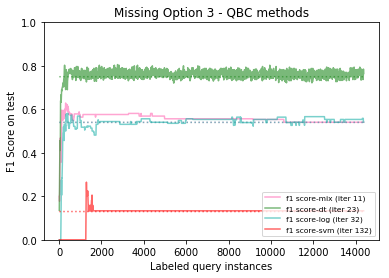

In [18]:
plt.plot(mix['quota'], mix['f1_score'], 'hotpink',label='f1 score-mix (iter 11)',alpha=0.6)
plt.plot(mix['quota'], [0.54] * (len(mix['quota'])), 'hotpink',linestyle = ':',alpha=0.6)
plt.plot(dt['quota'], dt['f1_score'], 'forestgreen',label='f1 score-dt (iter 23)',alpha=0.6)
plt.plot(dt['quota'], [0.75] * (len(dt['quota'])), 'forestgreen',linestyle = ':',alpha=0.6)
plt.plot(log['quota'], log['f1_score'], 'lightseagreen',label='f1 score-log (iter 32)',alpha=0.6)
plt.plot(log['quota'], [0.54] * (len(log['quota'])), 'lightseagreen',linestyle = ':',alpha=0.6)
plt.plot(svm['quota'], svm['f1_score'], 'red',label='f1 score-svm (iter 132)',alpha=0.6)
plt.plot(svm['quota'], [0.13] * (len(svm['quota'])), 'red',linestyle = ':',alpha=0.6)


plt.title('Missing Option 3 - QBC methods')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.savefig('convergence_inqbc.png')

- Number of 1s QBC & Uncertainity Sampling

In [19]:
log_u=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_all_uncertainity_log_10')
total1=[]
for i in log_u['label']:
    a=i.replace('[','').replace(']','').split(',')
    total1.append(sum([int(k.strip()) for k in a]))
log_u['total1s']=total1

sm=0
ls=[]
for i in log_u['total1s']:
    sm=sm+i
    ls.append(sm)

log_u['total1s_cum']=ls

In [20]:
log_d=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_all_dns_log_10')
total1=[]
for i in log_d['label']:
    a=i.replace('[','').replace(']','').split(',')
    total1.append(sum([int(k.strip()) for k in a]))
log_d['total1s']=total1

sm=0
ls=[]
for i in log_d['total1s']:
    sm=sm+i
    ls.append(sm)

log_d['total1s_cum']=ls

In [21]:
log_q=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_all_qbc_onlylog_10')
total1=[]
for i in log_q['label']:
    a=i.replace('[','').replace(']','').split(',')
    total1.append(sum([int(k.strip()) for k in a]))
log_q['total1s']=total1

sm=0
ls=[]
for i in log_q['total1s']:
    sm=sm+i
    ls.append(sm)

log_q['total1s_cum']=ls

In [22]:
qbc_mix=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_all_qbc_mixall_10')
total1=[]
for i in qbc_mix['label']:
    a=i.replace('[','').replace(']','').split(',')
    total1.append(sum([int(k.strip()) for k in a]))
qbc_mix['total1s']=total1

sm=0
ls=[]
for i in qbc_mix['total1s']:
    sm=sm+i
    ls.append(sm)

qbc_mix['total1s_cum']=ls

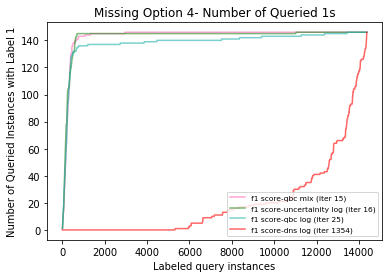

In [23]:
plt.plot(qbc_mix['quota'], qbc_mix['total1s_cum'], 'hotpink',label='f1 score-qbc mix (iter 15)',alpha=0.6)
plt.plot(log_u['quota'], log_u['total1s_cum'], 'forestgreen',label='f1 score-uncertainity log (iter 16)',alpha=0.6)
plt.plot(log_q['quota'], log_q['total1s_cum'], 'lightseagreen',label='f1 score-qbc log (iter 25)',alpha=0.6)
plt.plot(log_d['quota'], log_d['total1s_cum'], 'red',label='f1 score-dns log (iter 1354)',alpha=0.6)



plt.title('Missing Option 4- Number of Queried 1s')
plt.xlabel('Labeled query instances')
plt.ylabel('Number of Queried Instances with Label 1')
plt.legend(loc='lower right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
#plt.ylim(0, 1)
plt.savefig('number_of1s_overall.png')

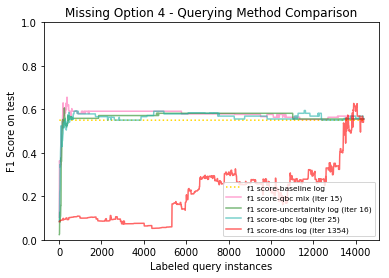

In [25]:
plt.plot(qbc_mix['quota'], [0.55] * (len(qbc_mix['quota'])), 'gold',linestyle = ':',label='f1 score-baseline log')
plt.plot(qbc_mix['quota'], qbc_mix['f1_score'], 'hotpink',label='f1 score-qbc mix (iter 15)',alpha=0.6)

plt.plot(log_u['quota'], log_u['f1_score'], 'forestgreen',label='f1 score-uncertainity log (iter 16)',alpha=0.6)
#plt.plot(log_u['quota'], [0.54] * (len(log_u['quota'])), 'forestgreen',linestyle = ':',alpha=0.6)

plt.plot(log_q['quota'], log_q['f1_score'], 'lightseagreen',label='f1 score-qbc log (iter 25)',alpha=0.6)
#plt.plot(log_q['quota'], [0.54] * (len(log_q['quota'])), 'lightseagreen',linestyle = ':',alpha=0.6)

plt.plot(log_d['quota'], log_d['f1_score'], 'red',label='f1 score-dns log (iter 1354)',alpha=0.6)
#plt.plot(log_d['quota'], [0.54] * (len(log_d['total1s_cum'])), 'red',linestyle = ':',alpha=0.6)


plt.title('Missing Option 4 - Querying Method Comparison')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.savefig('convergence_inall.png')

- Flunctiations

In [84]:
jac_qbc_log=get_dataset('Faster_Phone_opt4_onlyjac_qbc_onlylog_10')
jac_dns_log=get_dataset('Faster_Phone_opt4_onlyjac_dns_log_10')
jac_uncertain_log=get_dataset('Faster_Phone_opt4_onlyjac_uncertainity_log_10')
jac_uncertain_svm=get_dataset('Faster_Phone_opt4_onlyjac_uncertainity_svm_10')
jac_qbc_svm=get_dataset('Faster_Phone_opt4_onlyjac_qbc_onlysvm_10')

In [98]:
jac_qbc_log_3=get_dataset('Faster_Phone_opt3_onlyjac_qbc_onlylog_10')
jac_dns_log_3=get_dataset('Faster_Phone_opt3_onlyjac_dns_log_10')
jac_uncertain_log_3=get_dataset('Faster_Phone_opt3_onlyjac_uncertainity_log_10')
jac_uncertain_svm_3=get_dataset('Faster_Phone_opt3_onlyjac_uncertainity_svm_10')
jac_qbc_svm_3=get_dataset('Faster_Phone_opt3_onlyjac_qbc_onlysvm_10')

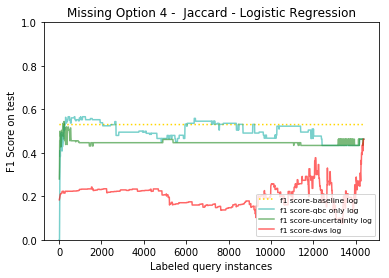

In [99]:
plt.plot(jac_qbc_log_3['quota'], [0.53] * (len(jac_qbc_log_3['quota'])), 'gold',linestyle = ':',label='f1 score-baseline log')
plt.plot(jac_qbc_log_3['quota'], jac_qbc_log_3['f1_score'], 'lightseagreen',label='f1 score-qbc only log',alpha=0.6)

plt.plot(jac_uncertain_log_3['quota'], jac_uncertain_log_3['f1_score'], 'forestgreen',label='f1 score-uncertainity log',alpha=0.6)
plt.plot(jac_dns_log_3['quota'], jac_dns_log_3['f1_score'], 'red',label='f1 score-dws log',alpha=0.6)

#plt.plot(log_u['quota'], [0.54] * (len(log_u['quota'])), 'forestgreen',linestyle = ':',alpha=0.6)

plt.title('Missing Option 4 -  Jaccard - Logistic Regression')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.savefig('f_jaccard_log.png')

In [85]:
all_qbc_log=get_dataset('Faster_Phone_opt4_all_qbc_onlylog_10')
all_dns_log=get_dataset('Faster_Phone_opt4_all_dns_log_10')
all_uncertain_log=get_dataset('Faster_Phone_opt4_all_uncertainity_log_10')
all_uncertain_svm=get_dataset('Faster_Phone_opt4_all_uncertainity_svm_10')
all_qbc_svm=get_dataset('Faster_Phone_opt4_all_qbc_onlysvm_10')

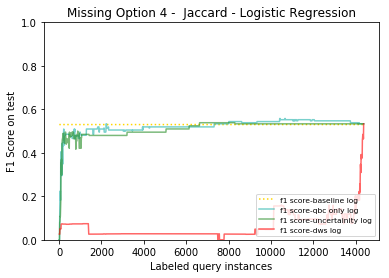

In [86]:
plt.plot(jac_qbc_log['quota'], [0.53] * (len(jac_qbc_log['quota'])), 'gold',linestyle = ':',label='f1 score-baseline log')
plt.plot(jac_qbc_log['quota'], jac_qbc_log['f1_score'], 'lightseagreen',label='f1 score-qbc only log',alpha=0.6)

plt.plot(jac_uncertain_log['quota'], jac_uncertain_log['f1_score'], 'forestgreen',label='f1 score-uncertainity log',alpha=0.6)
plt.plot(jac_dns_log['quota'], jac_dns_log['f1_score'], 'red',label='f1 score-dws log',alpha=0.6)

#plt.plot(log_u['quota'], [0.54] * (len(log_u['quota'])), 'forestgreen',linestyle = ':',alpha=0.6)

plt.title('Missing Option 4 -  Jaccard - Logistic Regression')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.savefig('f_jaccard_log.png')

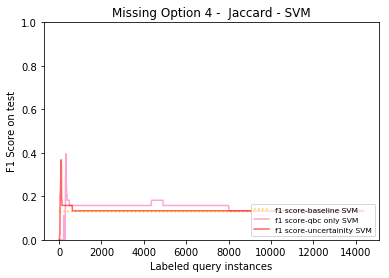

In [87]:
plt.plot(jac_qbc_svm['quota'], [0.13] * (len(jac_qbc_svm['quota'])), 'gold',linestyle = ':',label='f1 score-baseline SVM')
plt.plot(jac_qbc_svm['quota'], jac_qbc_svm['f1_score'], 'hotpink',label='f1 score-qbc only SVM',alpha=0.6)

plt.plot(jac_uncertain_svm['quota'], jac_uncertain_svm['f1_score'], 'red',label='f1 score-uncertainity SVM',alpha=0.6)
#plt.plot(log_u['quota'], [0.54] * (len(log_u['quota'])), 'forestgreen',linestyle = ':',alpha=0.6)

#f_jaccard_log
plt.title('Missing Option 4 -  Jaccard - SVM')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.savefig('f_jaccard_svm.png')

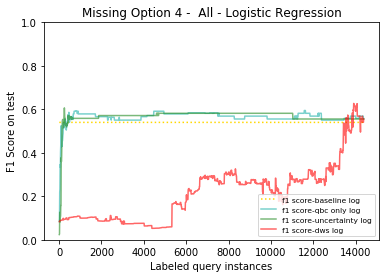

In [88]:
plt.plot(all_qbc_log['quota'], [0.54] * (len(all_qbc_log['quota'])), 'gold',linestyle = ':',label='f1 score-baseline log')
plt.plot(all_qbc_log['quota'], all_qbc_log['f1_score'], 'lightseagreen',label='f1 score-qbc only log',alpha=0.6)

plt.plot(all_uncertain_log['quota'], all_uncertain_log['f1_score'], 'forestgreen',label='f1 score-uncertainty log',alpha=0.6)
plt.plot(all_dns_log['quota'], all_dns_log['f1_score'], 'red',label='f1 score-dws log',alpha=0.6)
#plt.plot(log_u['quota'], [0.54] * (len(log_u['quota'])), 'forestgreen',linestyle = ':',alpha=0.6)
#f_jaccard_svm.png

plt.title('Missing Option 4 -  All - Logistic Regression')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.savefig('f_all_log.png')

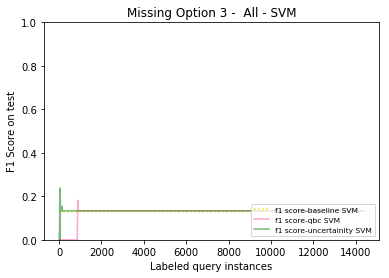

In [89]:
plt.plot(all_qbc_svm['quota'], [0.13] * (len(all_qbc_svm['quota'])), 'gold',linestyle = ':',label='f1 score-baseline SVM')
plt.plot(all_qbc_svm['quota'], all_qbc_svm['f1_score'], 'hotpink',label='f1 score-qbc SVM',alpha=0.6)

plt.plot(all_uncertain_svm['quota'], all_uncertain_svm['f1_score'], 'forestgreen',label='f1 score-uncertainity SVM',alpha=0.6)
#plt.plot(log_u['quota'], [0.54] * (len(log_u['quota'])), 'forestgreen',linestyle = ':',alpha=0.6)

plt.title('Missing Option 3 -  All - SVM')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.savefig('f_all_svm.png')

### 2.2.4. Batch Size Effect

In [57]:
labels=['Run_1','Run_10','Run_20','Run_50','Run_100']
run=[1,10,20,50,100]
seconds=[2793,1177,1120, 1029,1226]

In [58]:
df=pd.DataFrame({'labels':labels, 'seconds':seconds,'Batch size':run})
df.head()

,labels,seconds,Batch size
0,Run_1,2793,1
1,Run_10,1177,10
2,Run_20,1120,20
3,Run_50,1029,50
4,Run_100,1226,100


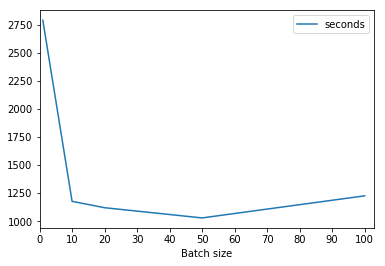

In [64]:
df.plot.line(x='Batch size', y='seconds',xlim=(0, 103),xticks=np.arange(0, 120, 10))

In [38]:
df[['labels','k']].plot

,labels,k
0,Run_1,1
1,Run_10,10
2,Run_20,20
3,Run_50,50
4,Run_100,100


Text(0, 0.5, 'Time measured at Seconds')

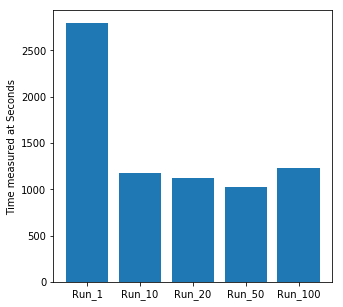

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.bar(df['labels'],df['seconds'])
ax.set_ylabel('Time measured at Seconds')

### 2.2.5. Seed Clustering Effect

In [70]:
clust=get_dataset('Faster_Phone_opt4_allvar_uncertainity_log_10_seedtesting_cluster',k='/')
rand=get_dataset('Faster_Phone_opt4_allvar_uncertainity_log_10_seedtesting_random',k='/')

In [100]:
clust.head()

,Unnamed: 0,iter,quota,f1_score,id_index,label,total1s,total1s_cum
0,0,0,10,0.000000,"[11220, 3214, 4502, 155, 3628, 1546, 2825, 163...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",1,1
1,1,1,20,0.027397,"[6381, 8417, 7877, 10086, 3119, 10157, 13485, ...","[0, 1, 0, 0, 0, 0, 1, 0, 1, 1]",4,5
2,2,2,30,0.051282,"[2481, 6283, 6614, 10853, 13053, 7188, 4919, 1...","[1, 0, 1, 0, 0, 0, 1, 0, 1, 1]",5,10
3,3,3,40,0.139535,"[941, 9110, 7841, 5978, 809, 4138, 2757, 1128,...","[0, 1, 1, 0, 0, 0, 0, 0, 1, 1]",4,14
4,4,4,50,0.193548,"[13763, 9807, 5587, 3290, 4391, 11736, 5642, 1...","[1, 0, 0, 0, 1, 1, 0, 0, 0, 1]",4,18


In [99]:
rand.head()

,Unnamed: 0,iter,quota,f1_score,id_index,label,total1s,total1s_cum
0,0,0,10,0.000000,"[11550, 13116, 5681, 7235, 11736, 12627, 4287,...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",1,1
1,1,1,20,0.122449,"[7729, 11222, 4599, 11005, 2831, 7747, 6025, 3...","[0, 1, 1, 0, 0, 0, 1, 0, 1, 1]",5,6
2,2,2,30,0.106383,"[2195, 13485, 11551, 5686, 1255, 5587, 8184, 3...","[1, 1, 0, 0, 0, 0, 0, 1, 0, 0]",3,9
3,3,3,40,0.075000,"[5375, 4269, 10196, 14120, 3290, 12553, 3119, ...","[0, 0, 0, 0, 0, 1, 0, 1, 0, 0]",2,11
4,4,4,50,0.219780,"[424, 8575, 10002, 12776, 2658, 4978, 2792, 12...","[0, 1, 1, 1, 0, 1, 0, 1, 0, 1]",6,17


<Figure size 1440x720 with 0 Axes>

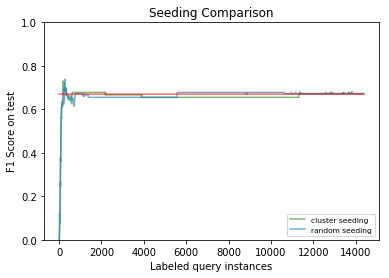

<Figure size 1440x720 with 0 Axes>

In [95]:
plt.plot(clust['quota'], clust['f1_score'], 'forestgreen',label='cluster seeding',alpha=0.6)
plt.plot(rand['quota'], rand['f1_score'], '-',label='random seeding',alpha=0.6)
plt.plot(rand['quota'], [0.67] * (len(rand['quota'])), 'red',alpha=0.6)

plt.title('Seeding Comparison')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.savefig('seeding.png')
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

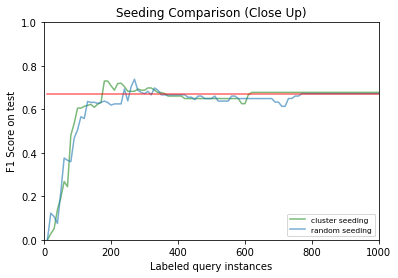

<Figure size 1440x720 with 0 Axes>

In [96]:
plt.plot(clust['quota'], clust['f1_score'], 'forestgreen',label='cluster seeding',alpha=0.6)
plt.plot(rand['quota'], rand['f1_score'], '-',label='random seeding',alpha=0.6)
plt.plot(rand['quota'], [0.67] * (len(rand['quota'])), 'red',alpha=0.6)

plt.title('Seeding Comparison (Close Up)')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.xlim(0,1000)
plt.savefig('seeding_close.png')
plt.figure(figsize=(20,10))

### 2.2.6. Feature Selection Effect

In [101]:
fet=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_fetselect_uncertainity_log_10')
jac=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_onlyjac_uncertainity_log_10')
jaro=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_onlyjaro_uncertainity_log_10')
lev=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_onlylev_uncertainity_log_10')
all_=pd.read_csv(os.getcwd()+'/Results/'+'Faster_Phone_opt4_all_uncertainity_log_10')

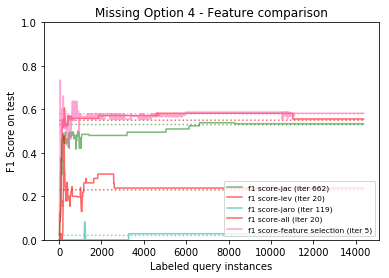

In [107]:
plt.plot(jac['quota'], jac['f1_score'], 'forestgreen',label='f1 score-jac (iter 662)',alpha=0.6)
plt.plot(jac['quota'], [0.53] * (len(jac['quota'])), 'forestgreen',linestyle = ':',alpha=0.6)
plt.plot(lev['quota'], lev['f1_score'], 'red',label='f1 score-lev (iter 20)',alpha=0.6)
plt.plot(lev['quota'], [0.23] * (len(lev['quota'])), 'red',linestyle = ':',alpha=0.6)
plt.plot(jaro['quota'], jaro['f1_score'], 'lightseagreen',label='f1 score-jaro (iter 119)',alpha=0.6)
plt.plot(jaro['quota'], [0.02] * (len(jaro['quota'])), 'lightseagreen',linestyle = ':',alpha=0.6)
plt.plot(all_['quota'], all_['f1_score'], 'red',label='f1 score-all (iter 20)',alpha=0.6)
plt.plot(all_['quota'], [0.55] * (len(all_['quota'])), 'red',linestyle = ':',alpha=0.6)
plt.plot(fet['quota'], fet['f1_score'], 'hotpink',label='f1 score-feature selection (iter 5)',alpha=0.6)
plt.plot(fet['quota'], [0.58] * (len(fet['quota'])), 'hotpink',linestyle = ':',alpha=0.6)


plt.title('Missing Option 4 - Feature comparison')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 7.5})
           #bbox_to_anchor=(1.65, 0.2))
plt.ylim(0, 1)
plt.savefig('featuresel_comp.png')

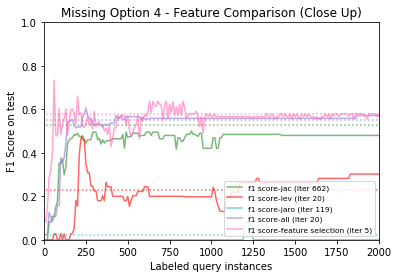

In [112]:
plt.plot(jac['quota'], jac['f1_score'], 'forestgreen',label='f1 score-jac (iter 662)',alpha=0.6)
plt.plot(jac['quota'], [0.53] * (len(jac['quota'])), 'forestgreen',linestyle = ':',alpha=0.6)
plt.plot(lev['quota'], lev['f1_score'], 'red',label='f1 score-lev (iter 20)',alpha=0.6)
plt.plot(lev['quota'], [0.23] * (len(lev['quota'])), 'red',linestyle = ':',alpha=0.6)
plt.plot(jaro['quota'], jaro['f1_score'], 'lightseagreen',label='f1 score-jaro (iter 119)',alpha=0.6)
plt.plot(jaro['quota'], [0.02] * (len(jaro['quota'])), 'lightseagreen',linestyle = ':',alpha=0.6)
plt.plot(all_['quota'], all_['f1_score'], 'mediumpurple',label='f1 score-all (iter 20)',alpha=0.6)
plt.plot(all_['quota'], [0.55] * (len(all_['quota'])), 'mediumpurple',linestyle = ':',alpha=0.6)
plt.plot(fet['quota'], fet['f1_score'], 'hotpink',label='f1 score-feature selection (iter 5)',alpha=0.6)
plt.plot(fet['quota'], [0.58] * (len(fet['quota'])), 'hotpink',linestyle = ':',alpha=0.6)


plt.title('Missing Option 4 - Feature Comparison (Close Up)')
plt.xlabel('Labeled query instances')
plt.ylabel('F1 Score on test')
plt.legend(loc='lower right',prop={'size': 7.5})
plt.ylim(0, 1)
plt.xlim(0,2000)
plt.savefig('featuresel_comp_closeup.png')